In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("telecom_customer_churn.csv")

In [3]:
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


## Data Preprocessing 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [5]:
#display Unique Values in dataframe
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Customer ID : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Gender : ['Female' 'Male']
Age : [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]
Married : ['Yes' 'No']
Number of Dependents : [0 3 1 2 4 6 5 9 7 8]
City : ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
Zip Code : [93225 91206 92627 ... 91934 93013 95956]
Latitude : [34.827662 34.162515 33.645672 ... 32.649787 34.441398 39.937017]
Longitude : [-118.999073 -118.203869 -117.922613 ... -116.2237   -119.513163
 -121.058043]
Number of Referrals : [ 2  0  1  3  8  9 10  5  4  7  6 11]
Tenure in Months : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 4

In [6]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [7]:
#remove redundent 
df=df.drop(['Customer ID','Churn Category','Churn Reason'],axis=1)
df

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,...,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
7039,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,...,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
7040,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,...,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined
7041,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,...,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


In [8]:
df.duplicated().sum()

0

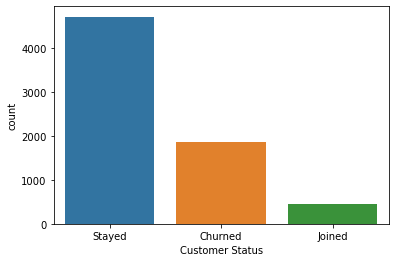

In [9]:
freq_status = sns.countplot(x="Customer Status",data=df)

In [10]:
counts_Customer_Status = df["Customer Status"].value_counts()
counts_Customer_Status

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [11]:
df = df[df["Customer Status"] != "Joined"]

In [12]:
counts_Customer_Status = df["Customer Status"].value_counts()
counts_Customer_Status

Stayed     4720
Churned    1869
Name: Customer Status, dtype: int64

In [13]:
#check Null Value 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.isnull().sum())

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     644
Multiple Lines                        644
Internet Service                        0
Internet Type                        1344
Avg Monthly GB Download              1344
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                         1344
Streaming Movies                     1344
Streaming Music                   

In [14]:
df["Avg Monthly Long Distance Charges"] = df["Avg Monthly Long Distance Charges"].fillna(0.0)


C:\Users\Chamodhi\AppData\Local\Temp\ipykernel_4112\4288879685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Avg Monthly Long Distance Charges"] = df["Avg Monthly Long Distance Charges"].fillna(0.0)


In [15]:
df['Multiple Lines'] = df['Multiple Lines'].fillna('no phone service')

C:\Users\Chamodhi\AppData\Local\Temp\ipykernel_4112\2281343605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Multiple Lines'] = df['Multiple Lines'].fillna('no phone service')


In [16]:
no_internet = ['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
               'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

df[no_internet] = df[no_internet].fillna('no internet service')


C:\Users\Chamodhi\AppData\Local\Temp\ipykernel_4112\1252338373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[no_internet] = df[no_internet].fillna('no internet service')


In [17]:
df["Avg Monthly GB Download"] = df["Avg Monthly GB Download"].fillna(0.0)

C:\Users\Chamodhi\AppData\Local\Temp\ipykernel_4112\4285678821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Avg Monthly GB Download"] = df["Avg Monthly GB Download"].fillna(0.0)


In [18]:
#check Null Value 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.isnull().sum())

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

In [19]:
df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [20]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,46.760510,0.476097,93491.504477,36.199761,-119.757670,2.020944,34.499772,23.004277,20.876461,65.030695,2432.042243,2.080938,7.169525,798.087251,3235.218082
std,16.841362,0.968499,1857.575392,2.472459,2.155696,3.024016,23.968734,15.466844,20.406247,31.100727,2265.500080,8.125054,25.803163,853.767972,2854.600036
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,0.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,92103.000000,33.989524,-121.788090,0.000000,12.000000,9.250000,4.000000,35.800000,544.550000,0.000000,0.000000,106.680000,835.450000
50%,46.000000,0.000000,93526.000000,36.245926,-119.601370,0.000000,32.000000,22.920000,17.000000,71.050000,1563.900000,0.000000,0.000000,472.680000,2376.450000
75%,60.000000,0.000000,95333.000000,38.169605,-117.967399,3.000000,57.000000,36.440000,27.000000,90.400000,4003.000000,0.000000,0.000000,1275.120000,5106.640000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [21]:
#correlation matrix
df.corr()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Age,1.000000,-0.125500,-0.002920,-0.004287,0.001842,-0.032019,-0.009574,-0.009553,-0.389419,0.124422,0.047788,0.020570,0.021759,-0.009976,0.035080
Number of Dependents,-0.125500,1.000000,0.014511,0.028938,-0.024010,0.276880,0.107311,-0.009199,0.129411,-0.136297,0.016118,0.012211,-0.015797,0.065869,0.032315
Zip Code,-0.002920,0.014511,1.000000,0.894887,-0.791316,0.003194,0.003644,0.008790,-0.014554,0.000918,-0.000837,-0.004874,-0.015409,0.002787,0.000044
Latitude,-0.004287,0.028938,0.894887,1.000000,-0.886324,0.021541,0.011568,0.004619,-0.030860,-0.018462,-0.003903,-0.009902,-0.013401,0.007609,-0.000915
Longitude,0.001842,-0.024010,-0.791316,-0.886324,1.000000,-0.011920,-0.009742,-0.006359,0.032627,0.016647,0.004496,-0.000701,0.009762,-0.006914,0.001591
Number of Referrals,-0.032019,0.276880,0.003194,0.021541,-0.011920,1.000000,0.323826,0.003205,0.034329,0.011015,0.241943,0.020372,-0.002547,0.207028,0.253851
Tenure in Months,-0.009574,0.107311,0.003644,0.011568,-0.009742,0.323826,1.000000,0.011992,0.029280,0.199019,0.812795,0.042729,0.071224,0.653170,0.840935
Avg Monthly Long Distance Charges,-0.009553,-0.009199,0.008790,0.004619,-0.006359,0.003205,0.011992,1.000000,-0.034002,0.131309,0.071022,-0.018207,0.002204,0.630419,0.244986
Avg Monthly GB Download,-0.389419,0.129411,-0.014554,-0.030860,0.032627,0.034329,0.029280,-0.034002,1.000000,0.362906,0.219765,-0.001054,0.085240,-0.003887,0.174023
Monthly Charge,0.124422,-0.136297,0.000918,-0.018462,0.016647,0.011015,0.199019,0.131309,0.362906,1.000000,0.619024,0.012562,0.114726,0.209095,0.554815


<AxesSubplot:>

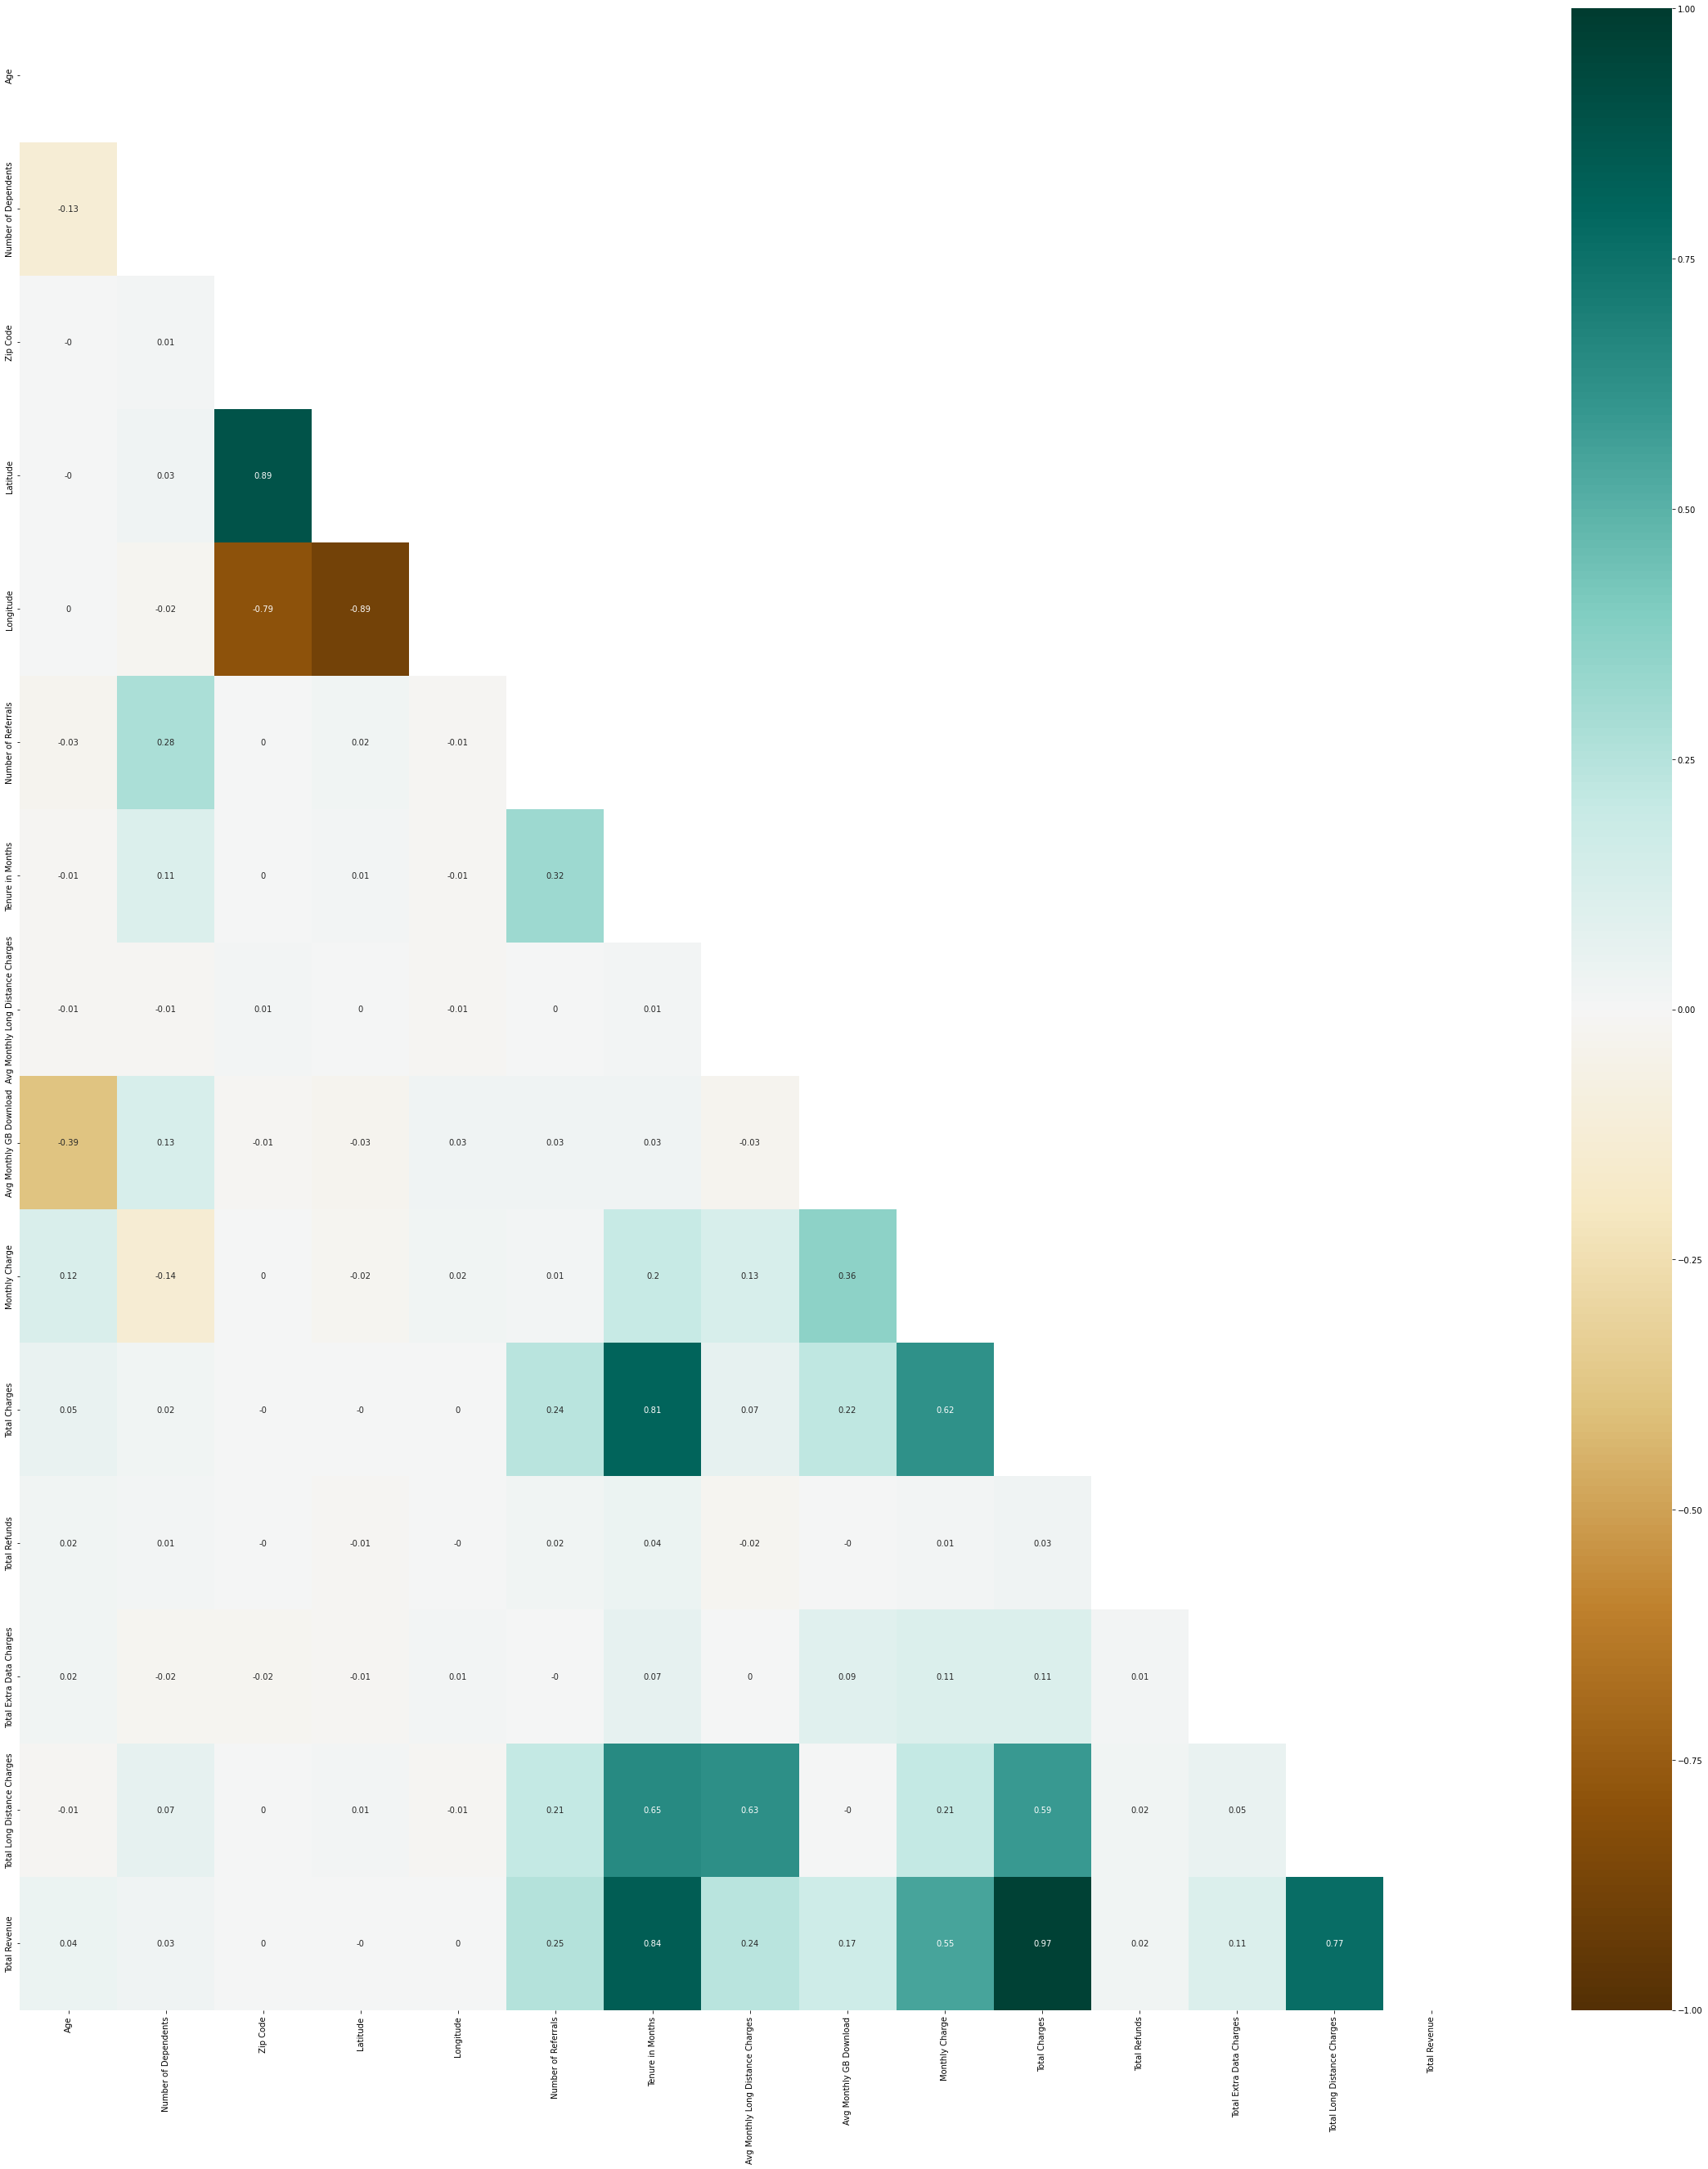

In [22]:
# a heatmap visualization of the correlation matrix
plt.figure(figsize=(40,45))
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype= bool))
sns.heatmap(matrix, annot=True, vmin=-1, vmax=1, mask=mask, cmap='BrBG')

### Explotary Data Analysis

#### Distribution of the taarget variable

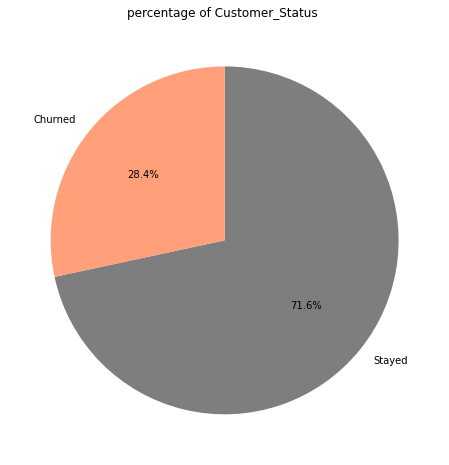

In [23]:
plt.rcParams["figure.figsize"] = (13,8)
mycolors = ["#7E7E7E", "#FFA07A", "#808000"]

def pie(pie_data,mycolors,title):
    plt.title(title)
    plt.pie(pie_data,labels = pie_data.index, startangle = 90, counterclock = False , autopct='%.1f%%',colors= mycolors)
pie(counts_Customer_Status,mycolors,"percentage of Customer_Status ")    

#### Demographic Analysis

In [24]:
df.City.unique()

array(['Frazier Park', 'Glendale', 'Costa Mesa', ..., 'Kirkwood',
       'Carpinteria', 'Meadow Valley'], dtype=object)

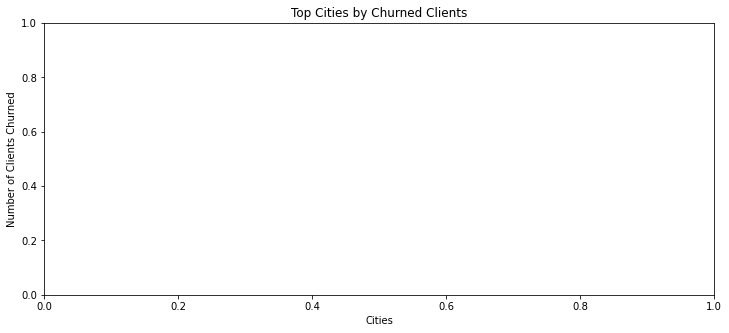

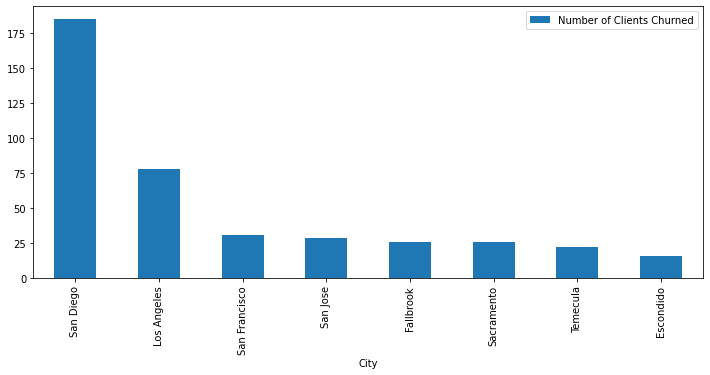

In [25]:
import matplotlib.pyplot as plt

# Assuming 'Customer Status' is the column containing values like 'Churned'
top_churned_cities = df[df["Customer Status"] == "Churned"].groupby("City").size().sort_values(ascending=False).head(8).reset_index(name="Number of Clients Churned")

plt.rcParams["figure.figsize"] = (12, 5)

def bars(bar_data, title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return bar_data.plot(x="City", y="Number of Clients Churned", kind="bar")

bars(top_churned_cities, "Top Cities by Churned Clients", "Cities", "Number of Clients Churned")
plt.show()



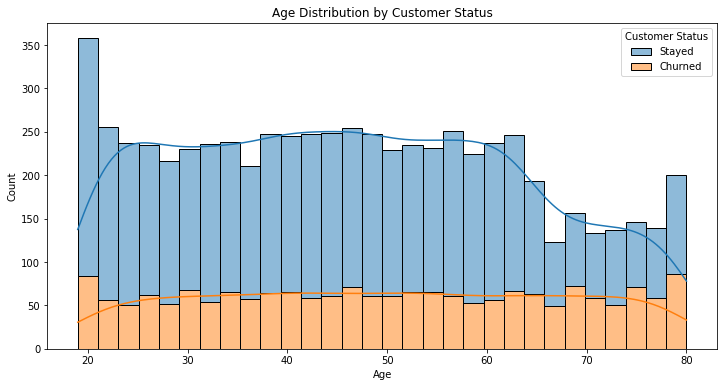

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Customer Status', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution by Customer Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [27]:
age_summary = df.groupby('Customer Status')['Age'].describe()
print(age_summary)


gender_summary = df.groupby(['Customer Status', 'Gender']).size().unstack()
print(gender_summary)


married_summary = df.groupby(['Customer Status', 'Married']).size().unstack()
print(married_summary)


dependents_summary = df.groupby(['Customer Status', 'Number of Dependents']).size().unstack()
print(dependents_summary)


                  count       mean        std   min   25%   50%   75%   max
Customer Status                                                            
Churned          1869.0  49.735688  17.604893  19.0  35.0  50.0  65.0  80.0
Stayed           4720.0  45.582415  16.382506  19.0  32.0  45.0  58.0  80.0
Gender           Female  Male
Customer Status              
Churned             939   930
Stayed             2338  2382
Married            No   Yes
Customer Status            
Churned          1200   669
Stayed           2071  2649
Number of Dependents       0      1      2      3    4    5    6    7    8  \
Customer Status                                                              
Churned               1763.0   38.0   33.0   30.0  1.0  2.0  1.0  1.0  NaN   
Stayed                3279.0  488.0  473.0  461.0  7.0  7.0  2.0  1.0  1.0   

Number of Dependents    9  
Customer Status            
Churned               NaN  
Stayed                1.0  


In [28]:
gender_summary = df.groupby(['Customer Status', 'Gender']).size().unstack()
print(gender_summary)


Gender           Female  Male
Customer Status              
Churned             939   930
Stayed             2338  2382


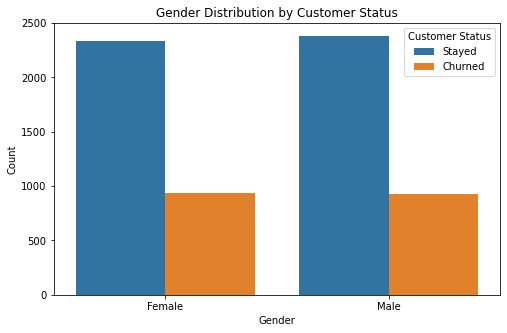

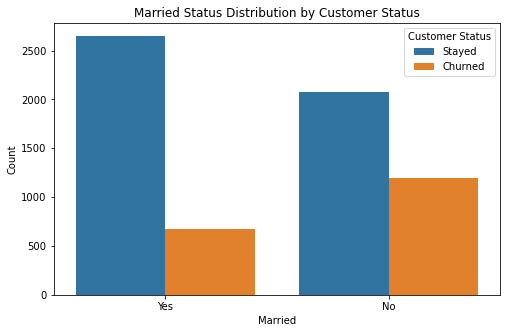

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Customer Status', data=df)
plt.title('Gender Distribution by Customer Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Married', hue='Customer Status', data=df)
plt.title('Married Status Distribution by Customer Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()




C:\Users\Chamodhi\AppData\Local\Temp\ipykernel_4112\3032047656.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


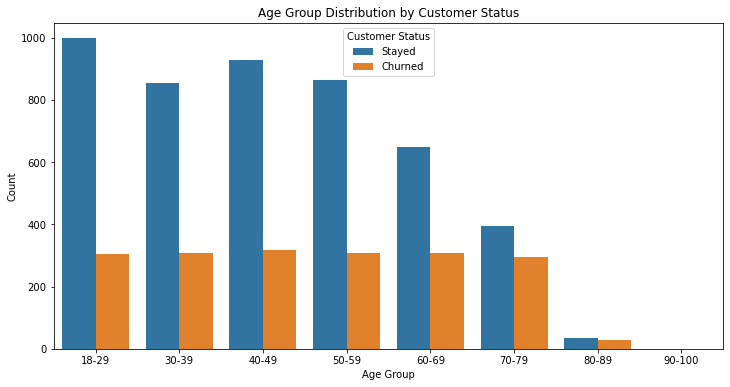

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define age groups
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Create a new column 'Age Group'
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Visualize age groups by customer status
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='Customer Status', data=df, order=age_labels)
plt.title('Age Group Distribution by Customer Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


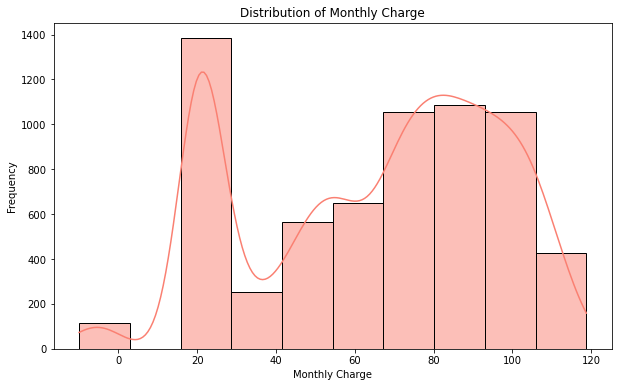

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly Charge'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Monthly Charge')
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')
plt.show()

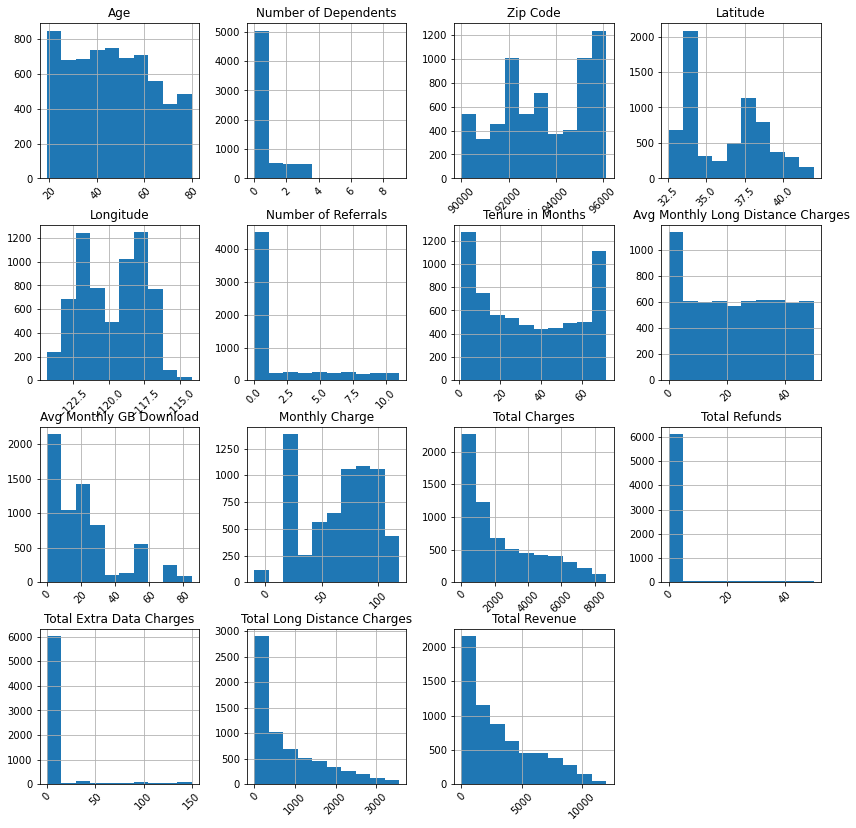

In [32]:
df.hist(figsize=(14,14), xrot=45);

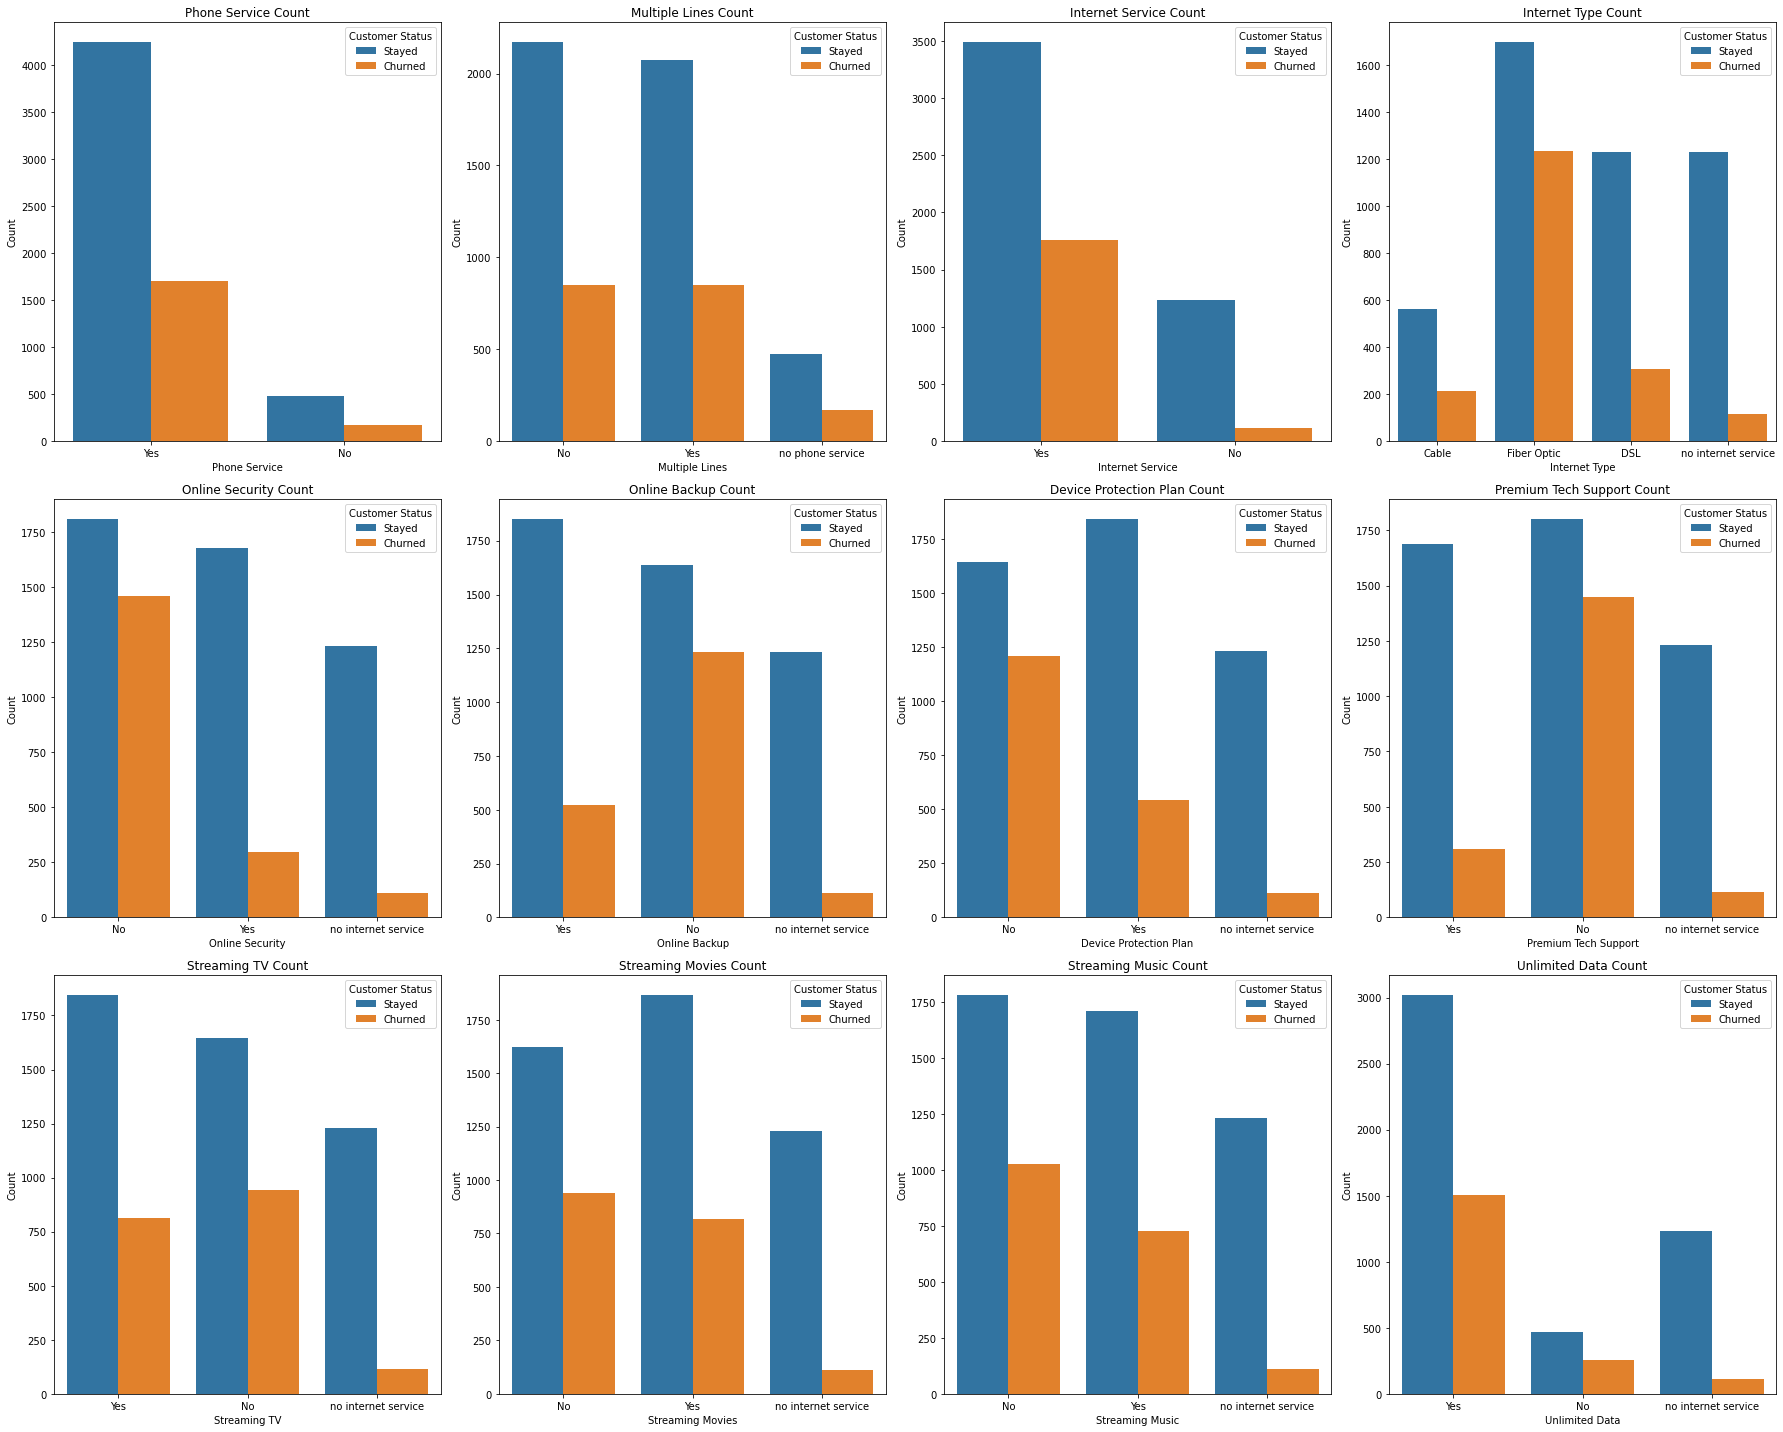

In [33]:
fig, axes = plt.subplots(3, 4, figsize=(25, 20))
axes = axes.flatten()
for i, col in enumerate(['Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']):
    sns.countplot(data=df, x=col, ax=axes[i], hue='Customer Status')
    axes[i].set_title(f'{col} Count')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

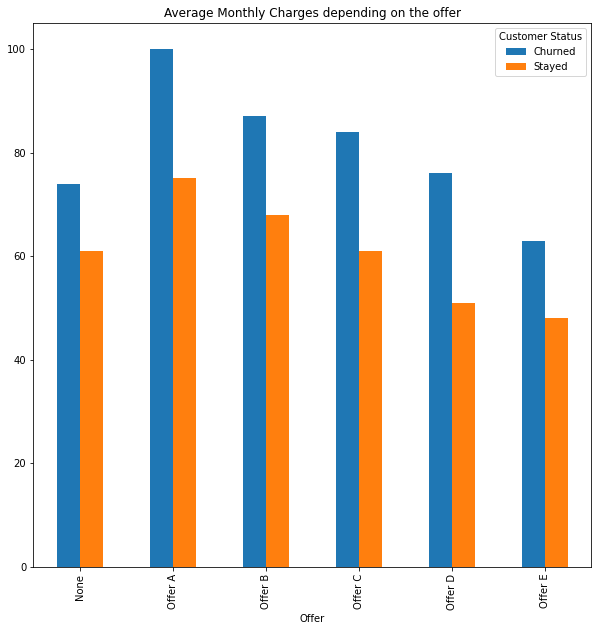

In [34]:
pd.crosstab(df['Offer'],df['Customer Status'],values=df['Monthly Charge'],aggfunc=np.mean).round(0).plot(kind='bar',title='Average Monthly Charges depending on the offer',figsize=(10,10));

In [35]:
df


,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Age Group
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,30-39
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,40-49
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,50-59
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,70-79
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,70-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,36,No,0,Fallbrook,92028,33.362575,-117.299644,0,4,...,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned,30-39
7038,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,...,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,18-29
7039,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,...,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,40-49
7041,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,...,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,18-29


#### Check Negative values 

In [36]:
df[df['Monthly Charge'] <= 0][['Monthly Charge','Total Revenue','Total Charges','Total Refunds','Total Extra Data Charges','Customer Status']]

,Monthly Charge,Total Revenue,Total Charges,Total Refunds,Total Extra Data Charges,Customer Status
1,-4.0,610.28,542.40,38.33,10,Stayed
32,-2.0,10830.97,7942.15,0.00,0,Stayed
170,-3.0,465.70,465.70,0.00,0,Stayed
232,-8.0,4669.60,4539.60,0.00,130,Stayed
336,-1.0,397.25,343.95,0.00,20,Churned
...,...,...,...,...,...,...
6894,-1.0,3301.73,2192.90,0.00,0,Stayed
6918,-7.0,8995.92,6860.60,44.00,0,Stayed
6976,-1.0,5620.45,3640.45,0.00,0,Churned
7020,-1.0,2907.77,2030.30,10.20,0,Churned


In [37]:
df = df[df['Monthly Charge'] >= 0]

### Data Transformation

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6475 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             6475 non-null   object  
 1   Age                                6475 non-null   int64   
 2   Married                            6475 non-null   object  
 3   Number of Dependents               6475 non-null   int64   
 4   City                               6475 non-null   object  
 5   Zip Code                           6475 non-null   int64   
 6   Latitude                           6475 non-null   float64 
 7   Longitude                          6475 non-null   float64 
 8   Number of Referrals                6475 non-null   int64   
 9   Tenure in Months                   6475 non-null   int64   
 10  Offer                              6475 non-null   object  
 11  Phone Service                      6475 non

In [39]:
#display Unique Values in dataframe
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Gender : ['Female' 'Male']
Age : [37 50 78 75 23 67 52 68 43 47 25 58 32 39 79 26 30 34 42 64 48 28 33 31
 60 69 20 46 57 19 38 35 72 51 66 61 24 55 59 71 49 40 21 45 29 62 76 77
 73 41 56 54 22 80 63 53 44 70 74 36 27 65]
Married : ['Yes' 'No']
Number of Dependents : [0 3 1 2 4 6 5 9 7 8]
City : ['Frazier Park' 'Costa Mesa' 'Martinez' ... 'Carpinteria' 'Meadow Valley'
 'Kirkwood']
Zip Code : [93225 92627 94553 ... 95050 95956 95646]
Latitude : [34.827662 33.645672 38.014457 ... 37.351214 39.937017 38.631489]
Longitude : [-118.999073 -117.922613 -122.115432 ... -121.952417 -121.058043
 -120.015167]
Number of Referrals : [ 2  0  1  3  8  9 10  5  4  7  6 11]
Tenure in Months : [ 9  4 13  3 71 63  7 65 54 72  5 56 34 45  1 50 23 55 26 69 37 49 67 20
 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21 61
 15 44 66 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Offer : ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service : ['Yes' 'No']

In [40]:
#remove redundent 
df=df.drop(['Age Group'],axis=1)
df

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,One Year,Yes,Credit Card,65.60,593.30,0.0,0,381.51,974.81,Stayed
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned
5,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,9,...,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,36,No,0,Fallbrook,92028,33.362575,-117.299644,0,4,...,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned
7038,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,...,One Year,No,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed
7039,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,...,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned
7041,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,...,Two Year,No,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed


In [41]:
#Apply one hot encoding for Loction 
df = pd.get_dummies(df, columns = ['Offer','Internet Type','Contract','Payment Method'], dtype=int)
df

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_no internet service,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,1,0,0,0,0,1,0,0,1,0
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,0,0,1,0,1,0,0,1,0,0
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,0,0,1,0,1,0,0,1,0,0
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,0,0,1,0,1,0,0,0,1,0
5,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,9,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,36,No,0,Fallbrook,92028,33.362575,-117.299644,0,4,...,0,0,0,1,1,0,0,1,0,0
7038,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,...,0,1,0,0,0,1,0,0,1,0
7039,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,...,0,0,1,0,1,0,0,1,0,0
7041,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,...,1,0,0,0,0,0,1,0,1,0


In [42]:
# Apply label encoding using get_dummies with drop_first=True
df = pd.get_dummies(df, columns=['Married','Phone Service','Internet Service','Gender','Paperless Billing','Customer Status'], drop_first=True, dtype=int)
df

,Age,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Married_Yes,Phone Service_Yes,Internet Service_Yes,Gender_Male,Paperless Billing_Yes,Customer Status_Stayed
0,37,0,Frazier Park,93225,34.827662,-118.999073,2,9,42.39,No,...,0,0,1,0,1,1,1,0,1,1
2,50,0,Costa Mesa,92627,33.645672,-117.922613,0,4,33.65,No,...,0,1,0,0,0,1,1,1,1,0
3,78,0,Martinez,94553,38.014457,-122.115432,1,13,27.82,No,...,0,1,0,0,1,1,1,1,1,0
4,75,0,Camarillo,93010,34.227846,-119.079903,3,3,7.38,No,...,0,0,1,0,1,1,1,0,1,0
5,23,3,Midpines,95345,37.581496,-119.972762,0,9,16.77,No,...,0,0,1,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,36,0,Fallbrook,92028,33.362575,-117.299644,0,4,2.01,No,...,0,1,0,0,0,1,0,0,0,0
7038,20,0,La Mesa,91941,32.759327,-116.997260,0,13,46.68,No,...,0,0,1,0,0,1,1,0,0,1
7039,40,0,Riverbank,95367,37.734971,-120.954271,1,22,16.20,Yes,...,0,1,0,0,1,1,1,1,1,0
7041,21,0,Solana Beach,92075,33.001813,-117.263628,5,67,2.12,No,...,1,0,1,0,1,1,1,1,0,1


In [43]:
# Apply label encoding using get_dummies with drop_first=True
df = pd.get_dummies(df, columns=['Multiple Lines','Online Security','Online Backup','Device Protection Plan','Premium Tech Support',
'Streaming TV','Streaming Movies','Streaming Music','Unlimited Data'], drop_first=True, dtype=int)
df

,Age,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,...,Premium Tech Support_Yes,Premium Tech Support_no internet service,Streaming TV_Yes,Streaming TV_no internet service,Streaming Movies_Yes,Streaming Movies_no internet service,Streaming Music_Yes,Streaming Music_no internet service,Unlimited Data_Yes,Unlimited Data_no internet service
0,37,0,Frazier Park,93225,34.827662,-118.999073,2,9,42.39,16.0,...,1,0,1,0,0,0,0,0,1,0
2,50,0,Costa Mesa,92627,33.645672,-117.922613,0,4,33.65,30.0,...,0,0,0,0,0,0,0,0,1,0
3,78,0,Martinez,94553,38.014457,-122.115432,1,13,27.82,4.0,...,0,0,1,0,1,0,0,0,1,0
4,75,0,Camarillo,93010,34.227846,-119.079903,3,3,7.38,11.0,...,1,0,1,0,0,0,0,0,1,0
5,23,3,Midpines,95345,37.581496,-119.972762,0,9,16.77,73.0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,36,0,Fallbrook,92028,33.362575,-117.299644,0,4,2.01,0.0,...,0,1,0,1,0,1,0,1,0,1
7038,20,0,La Mesa,91941,32.759327,-116.997260,0,13,46.68,59.0,...,1,0,0,0,0,0,1,0,1,0
7039,40,0,Riverbank,95367,37.734971,-120.954271,1,22,16.20,17.0,...,0,0,0,0,1,0,1,0,1,0
7041,21,0,Solana Beach,92075,33.001813,-117.263628,5,67,2.12,58.0,...,1,0,0,0,1,0,1,0,1,0


In [44]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
import category_encoders as ce

# Assuming 'City' is the column you want to encode in your DataFrame 'df'
# Initialize BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['City'])

# Apply binary encoding
df_encoded = binary_encoder.fit_transform(df['City'])

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df.drop('City', axis=1), df_encoded], axis=1)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6475 entries, 0 to 7042
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         6475 non-null   int64  
 1   Number of Dependents                        6475 non-null   int64  
 2   Zip Code                                    6475 non-null   int64  
 3   Latitude                                    6475 non-null   float64
 4   Longitude                                   6475 non-null   float64
 5   Number of Referrals                         6475 non-null   int64  
 6   Tenure in Months                            6475 non-null   int64  
 7   Avg Monthly Long Distance Charges           6475 non-null   float64
 8   Avg Monthly GB Download                     6475 non-null   float64
 9   Monthly Charge                              6475 non-null   float64
 10  Total Charge

In [47]:
df

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,...,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10
0,37,0,93225,34.827662,-118.999073,2,9,42.39,16.0,65.60,...,0,0,0,0,0,0,0,0,0,1
2,50,0,92627,33.645672,-117.922613,0,4,33.65,30.0,73.90,...,0,0,0,0,0,0,0,0,1,0
3,78,0,94553,38.014457,-122.115432,1,13,27.82,4.0,98.00,...,0,0,0,0,0,0,0,0,1,1
4,75,0,93010,34.227846,-119.079903,3,3,7.38,11.0,83.90,...,0,0,0,0,0,0,0,1,0,0
5,23,3,95345,37.581496,-119.972762,0,9,16.77,73.0,69.40,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,36,0,92028,33.362575,-117.299644,0,4,2.01,0.0,20.95,...,0,0,0,1,0,0,1,0,1,0
7038,20,0,91941,32.759327,-116.997260,0,13,46.68,59.0,55.15,...,0,0,0,0,0,0,1,1,0,1
7039,40,0,95367,37.734971,-120.954271,1,22,16.20,17.0,85.10,...,1,0,0,1,0,0,0,1,1,0
7041,21,0,92075,33.001813,-117.263628,5,67,2.12,58.0,67.85,...,0,0,0,0,1,0,1,0,0,1


In [48]:
#display Unique Values in dataframe
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Age : [37 50 78 75 23 67 52 68 43 47 25 58 32 39 79 26 30 34 42 64 48 28 33 31
 60 69 20 46 57 19 38 35 72 51 66 61 24 55 59 71 49 40 21 45 29 62 76 77
 73 41 56 54 22 80 63 53 44 70 74 36 27 65]
Number of Dependents : [0 3 1 2 4 6 5 9 7 8]
Zip Code : [93225 92627 94553 ... 95050 95956 95646]
Latitude : [34.827662 33.645672 38.014457 ... 37.351214 39.937017 38.631489]
Longitude : [-118.999073 -117.922613 -122.115432 ... -121.952417 -121.058043
 -120.015167]
Number of Referrals : [ 2  0  1  3  8  9 10  5  4  7  6 11]
Tenure in Months : [ 9  4 13  3 71 63  7 65 54 72  5 56 34 45  1 50 23 55 26 69 37 49 67 20
 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21 61
 15 44 66 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Avg Monthly Long Distance Charges : [42.39 33.65 27.82 ... 10.04 25.59  2.01]
Avg Monthly GB Download : [16. 30.  4. 11. 73. 14.  7. 21. 10. 59. 19. 12. 20. 17.  9.  0. 52. 57.
 51. 22. 23. 27.  2. 69. 53. 15. 29. 85. 28. 18. 48. 25. 26.  

### Outlier Handling

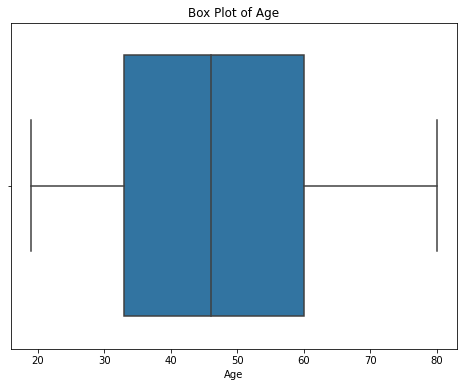

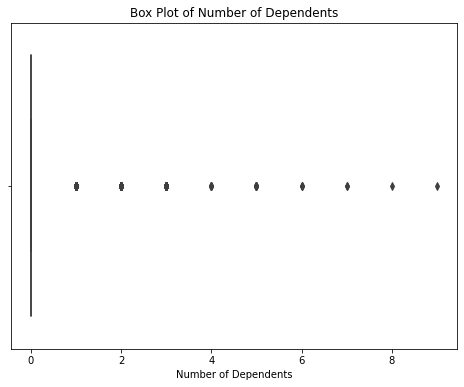

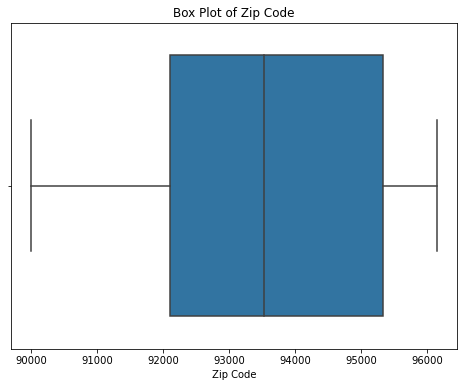

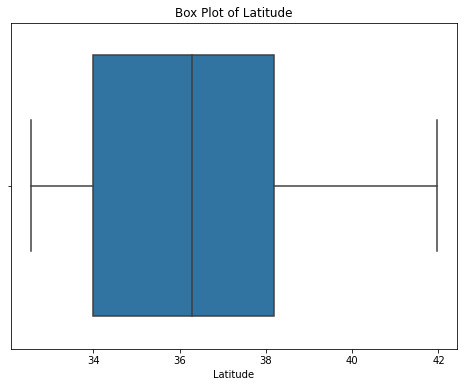

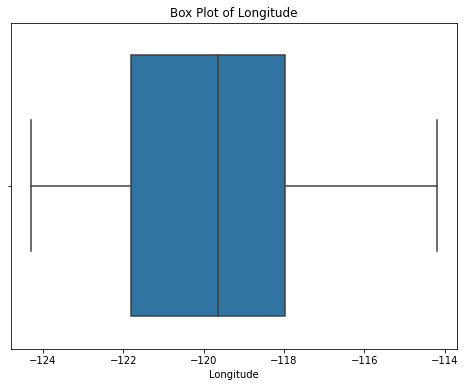

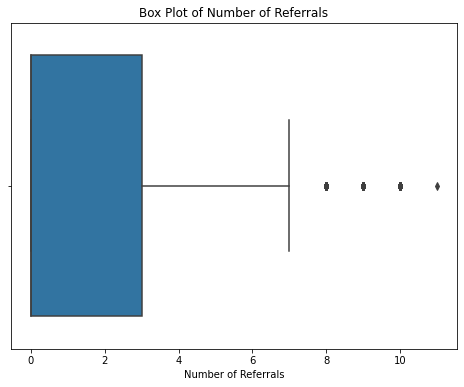

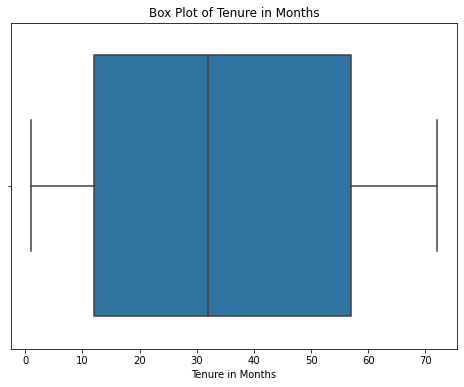

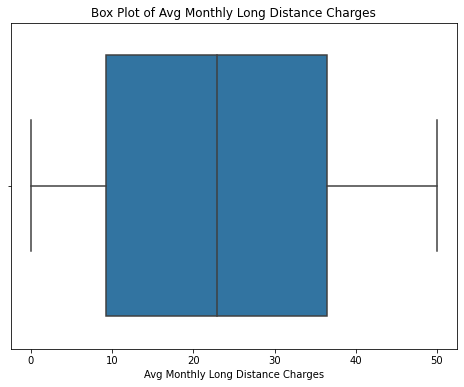

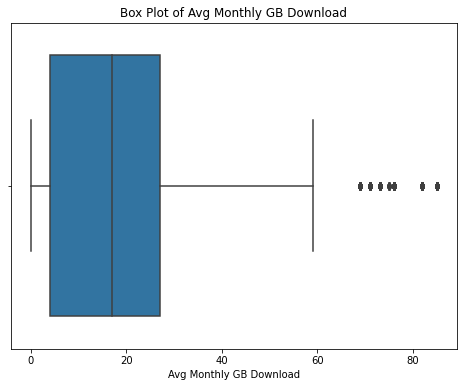

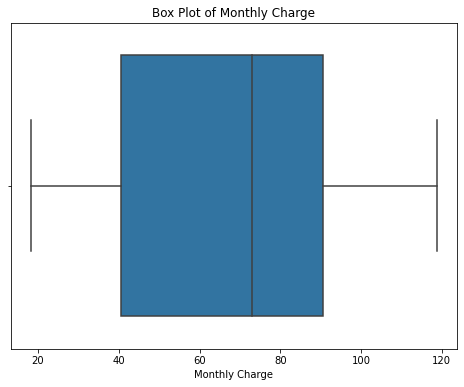

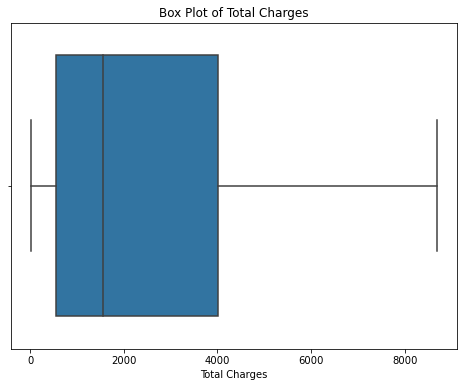

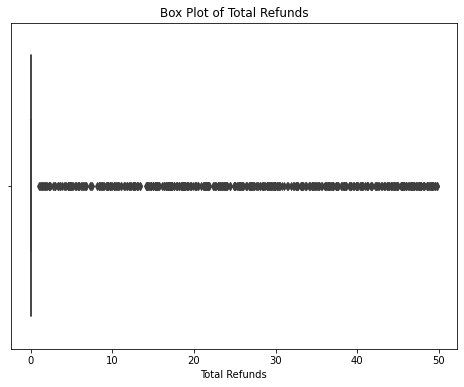

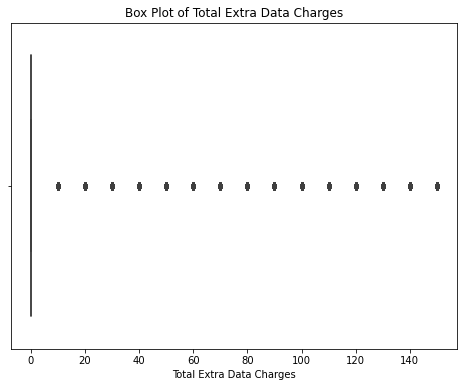

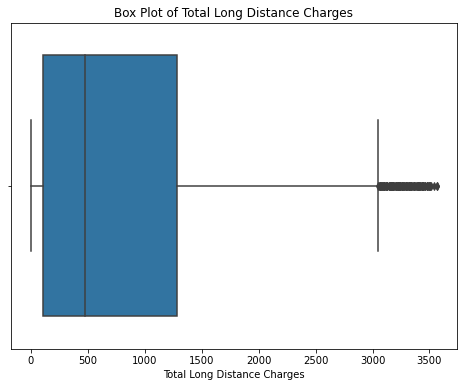

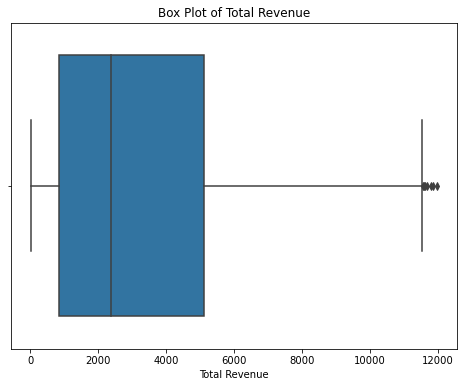

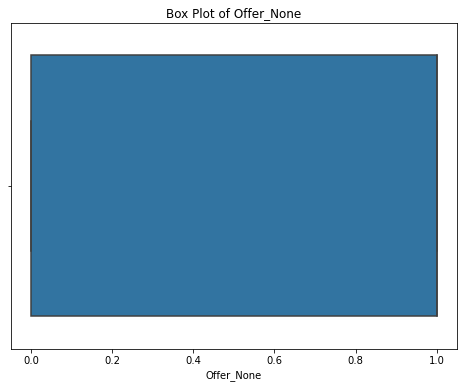

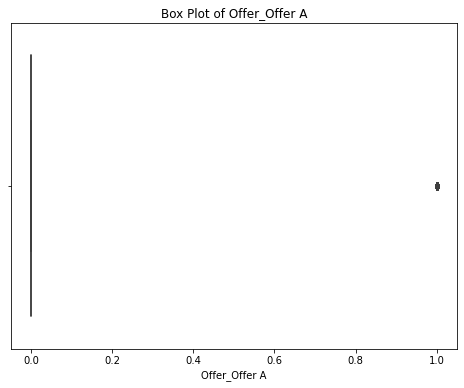

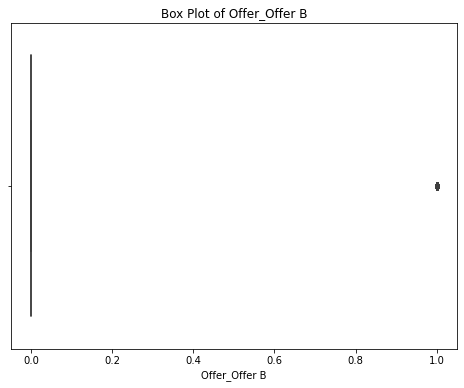

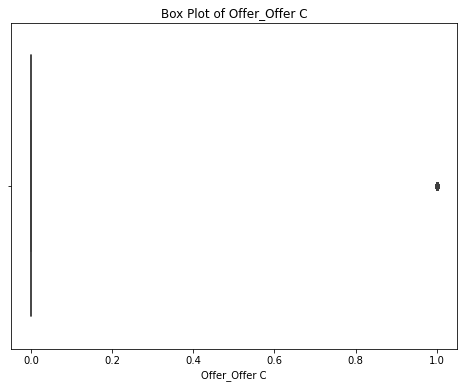

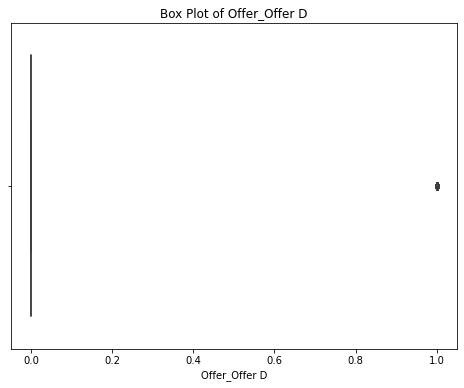

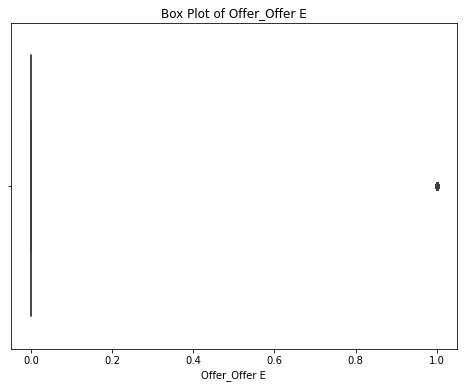

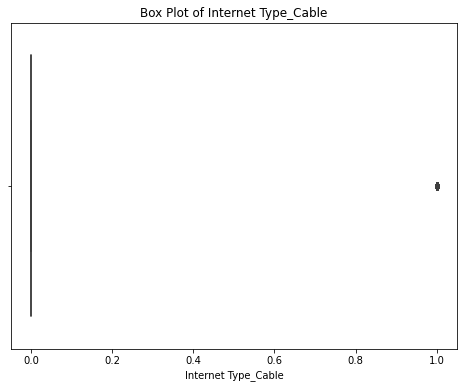

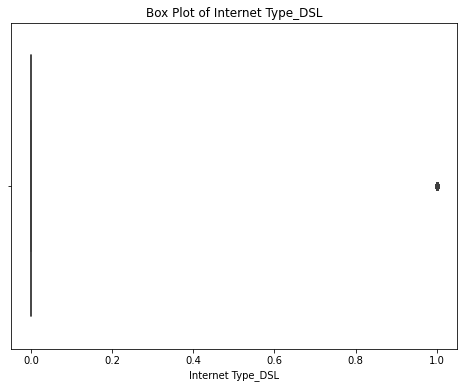

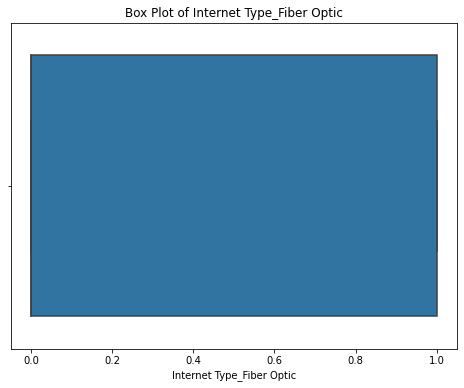

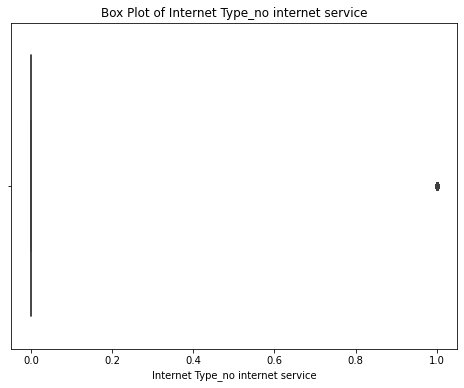

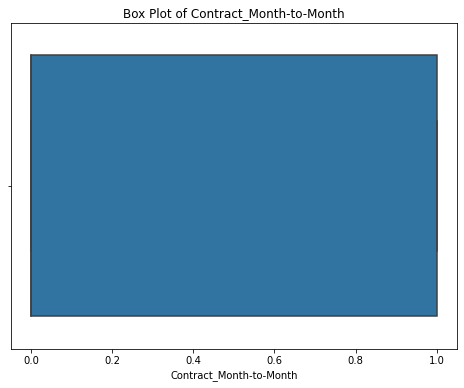

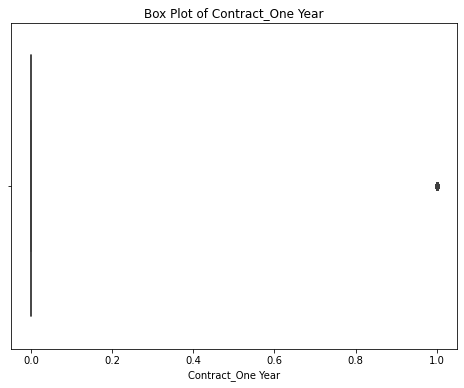

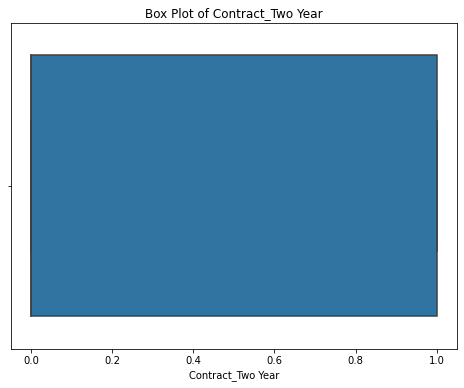

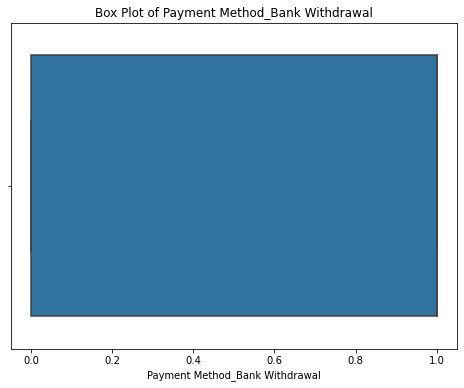

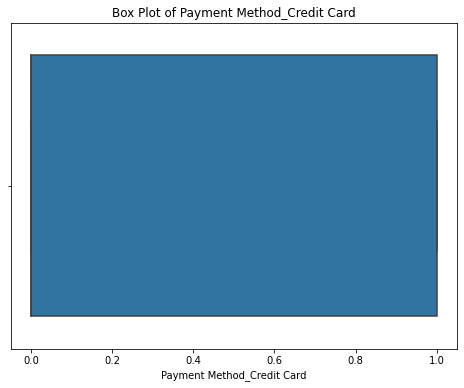

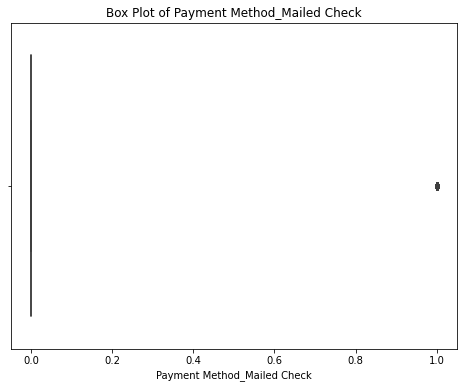

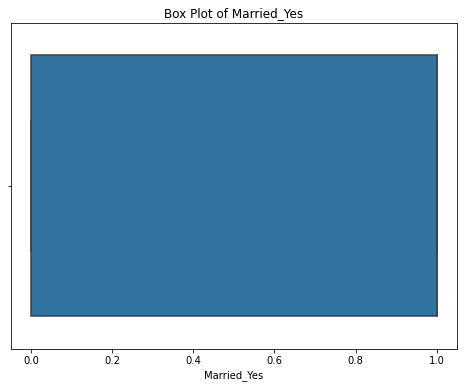

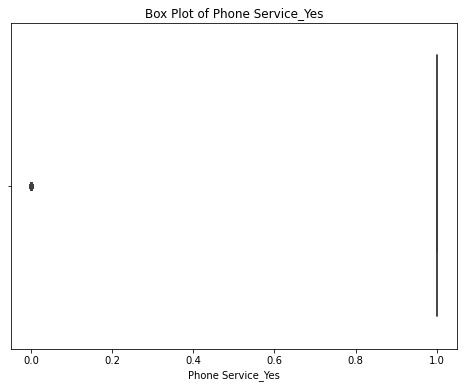

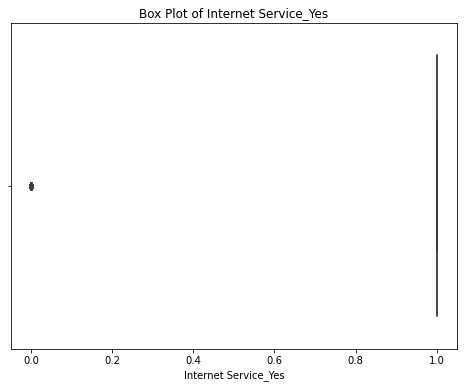

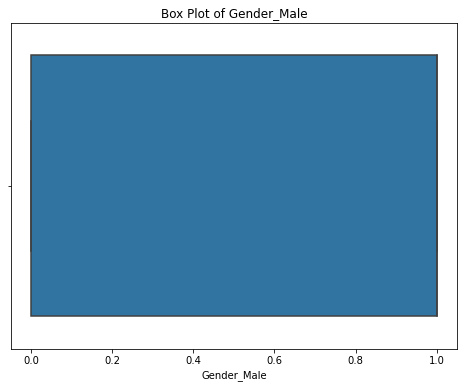

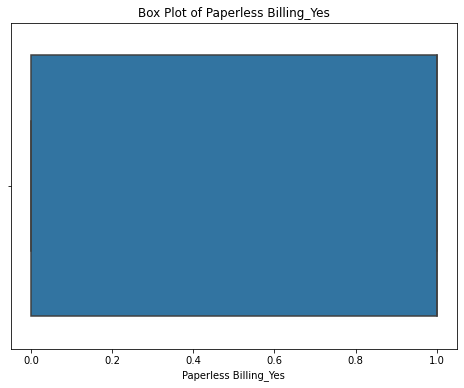

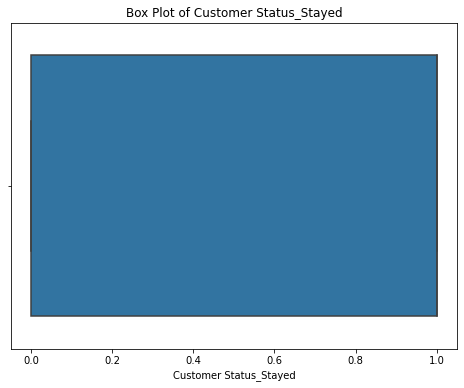

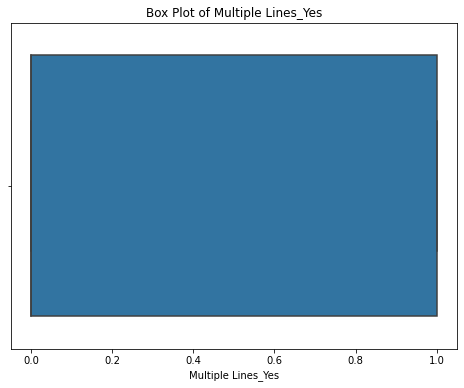

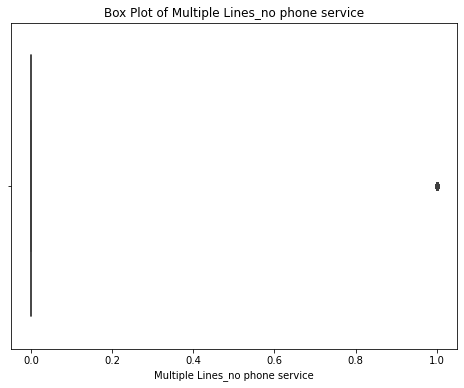

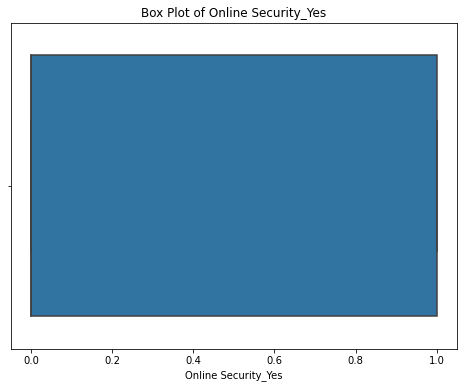

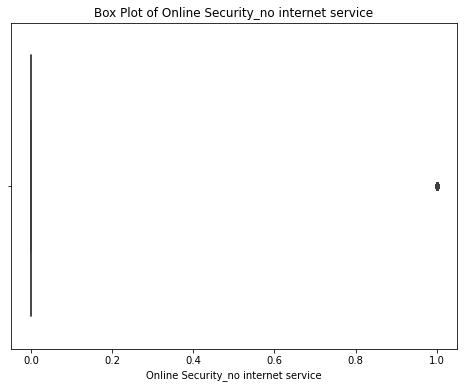

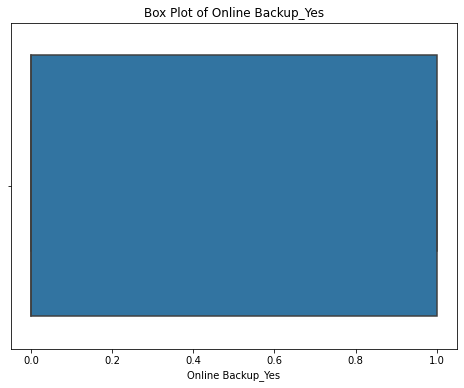

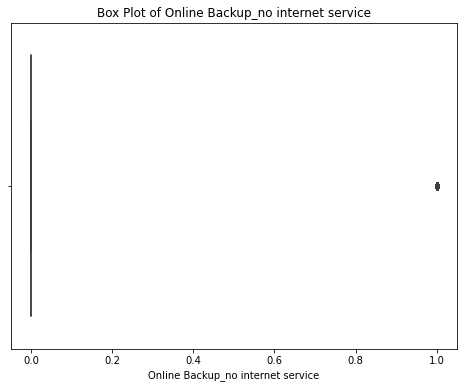

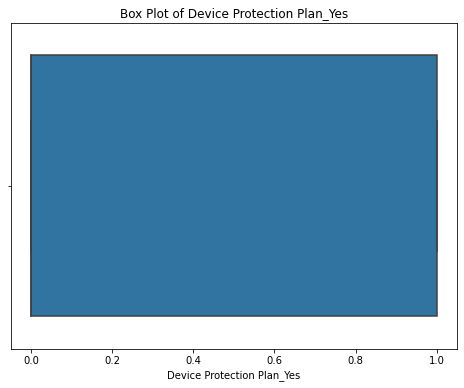

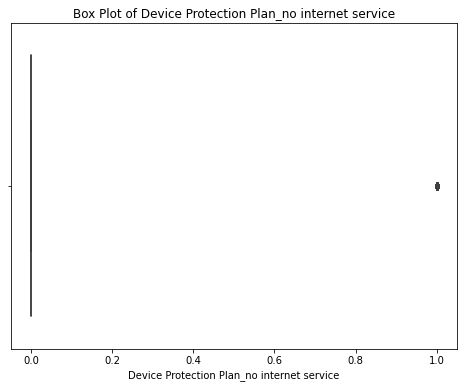

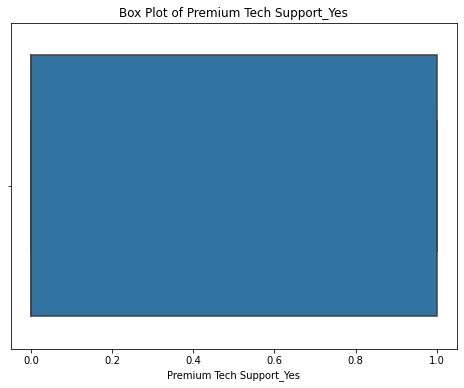

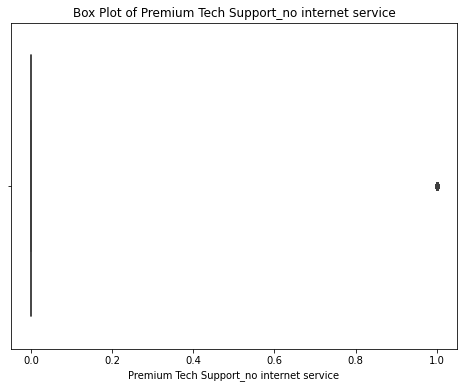

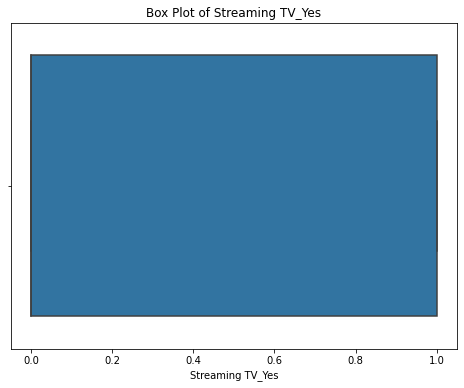

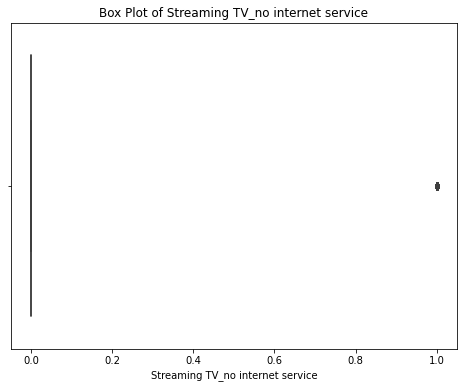

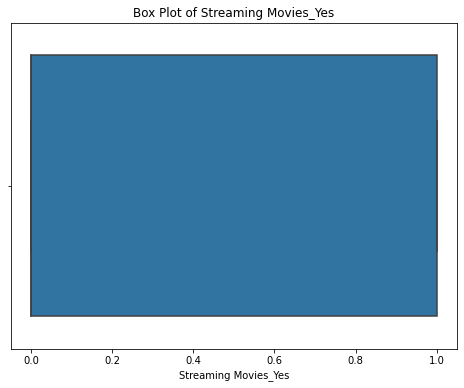

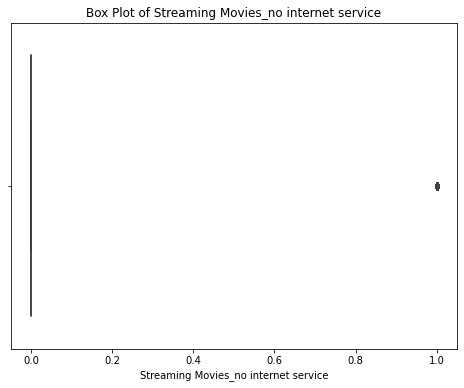

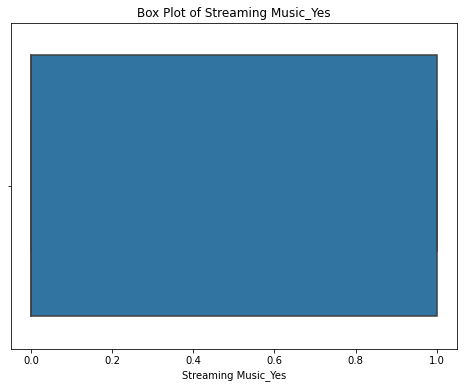

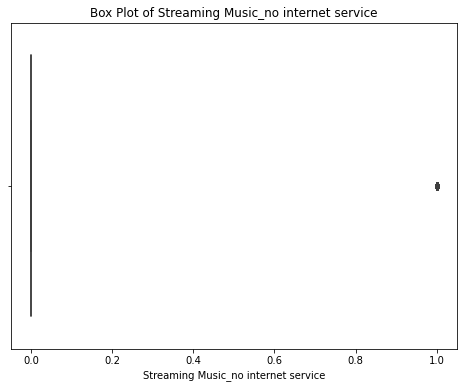

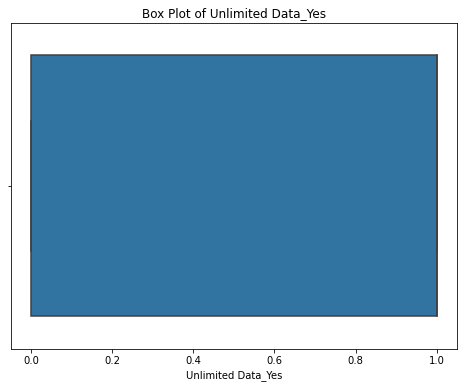

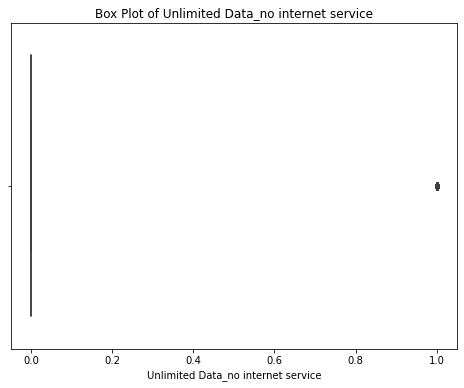

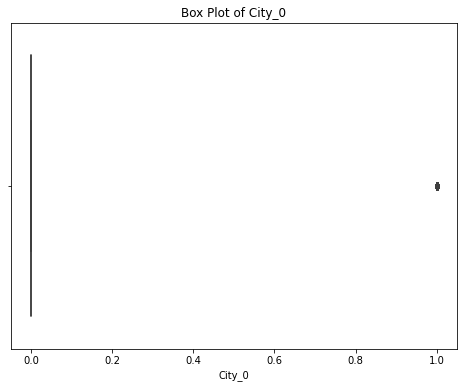

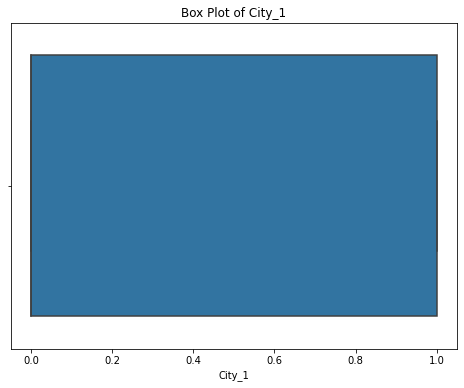

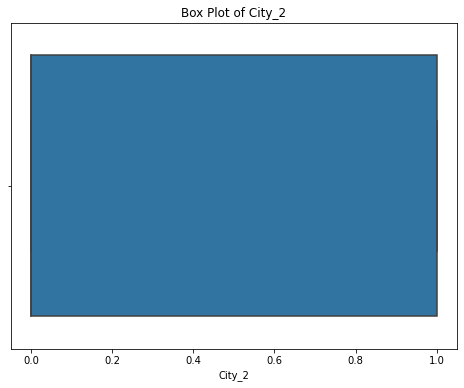

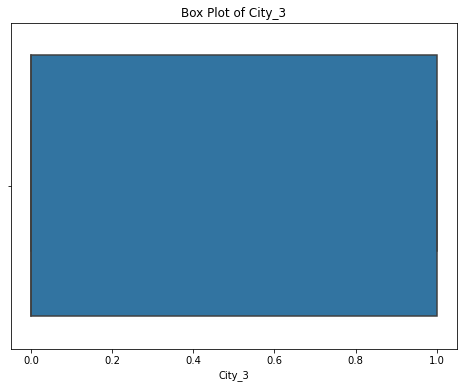

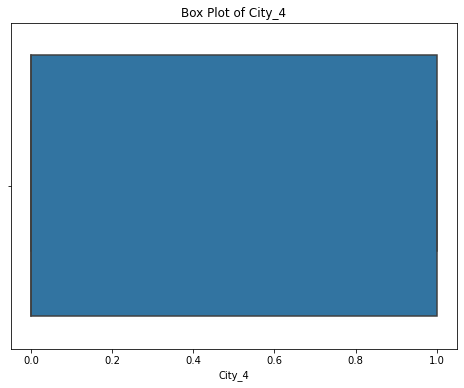

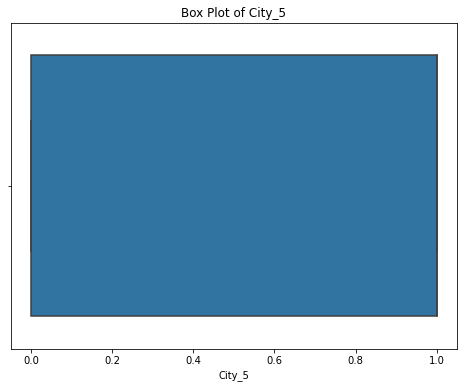

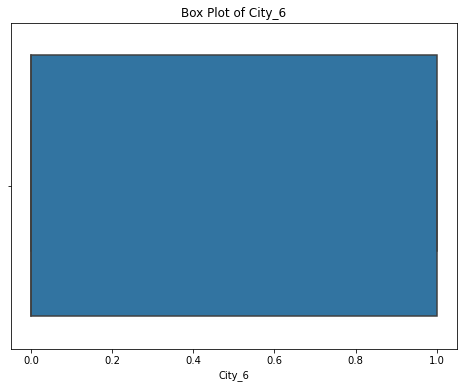

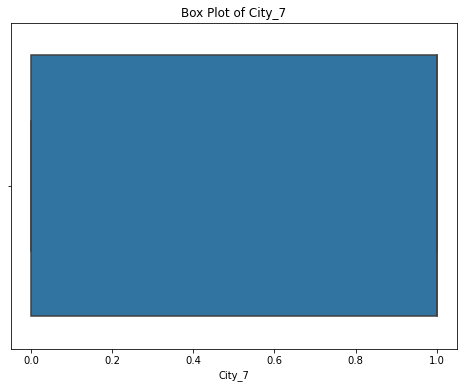

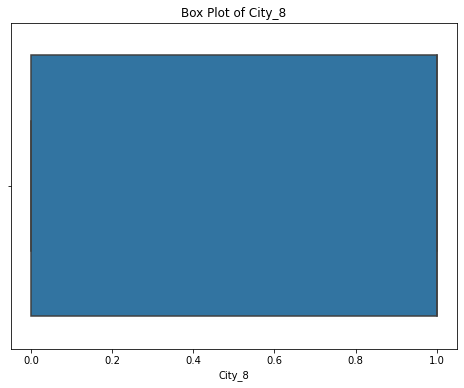

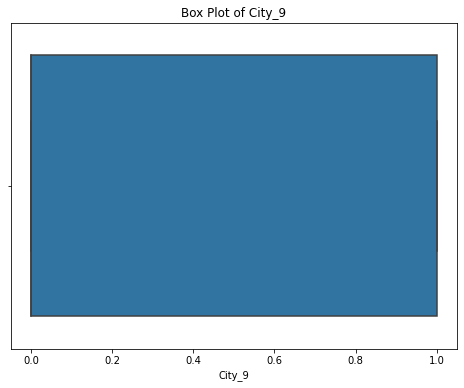

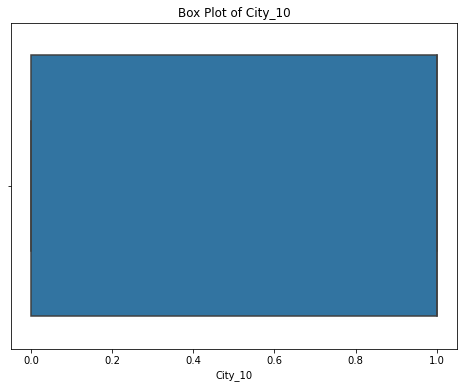

In [49]:
num_cols = df.select_dtypes(include=['int64', 'float64','int32']).columns
#Use box plots to identify outliers and understand the distribution. - Before Handling outliers
for col in num_cols:

    plt.figure(figsize=(8, 6))

    sns.boxplot(x=df[col])

    plt.title(f'Box Plot of {col}')

    plt.show()

In [50]:
import pandas as pd
import numpy as np
 
# Exclude string columns from outlier detection and clipping
numeric_vars = [col for col in num_cols if df[col].dtype != object]
 
# Define upper and lower bounds for each numeric column
upper_bounds = df[numeric_vars].quantile(0.78)
lower_bounds = df[numeric_vars].quantile(0.21)
 
# Replace outliers with upper and lower bounds
df[numeric_vars] = df[numeric_vars].clip(lower=lower_bounds, upper=upper_bounds, axis=1)

C:\Users\Chamodhi\AppData\Local\Temp\ipykernel_4112\3768712043.py:12: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df[numeric_vars] = df[numeric_vars].clip(lower=lower_bounds, upper=upper_bounds, axis=1)


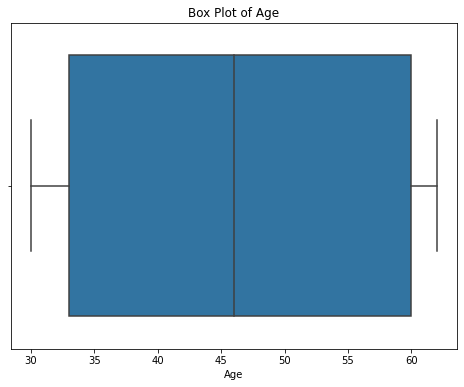

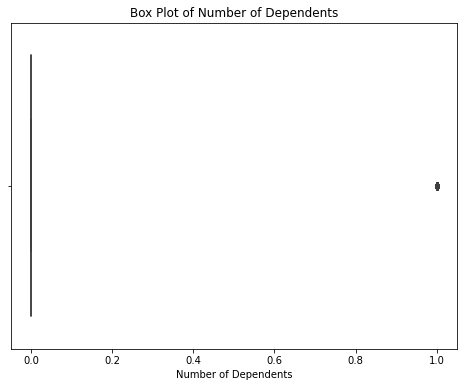

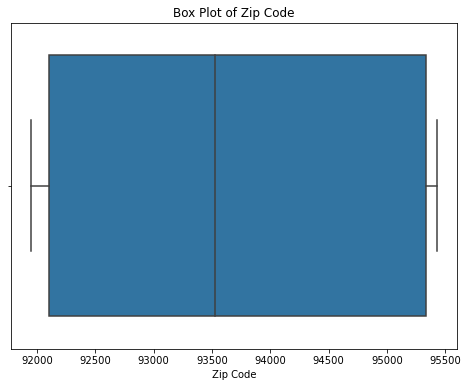

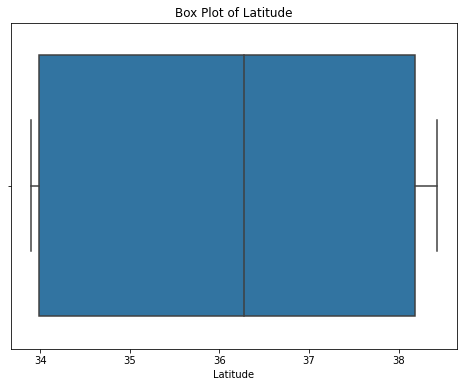

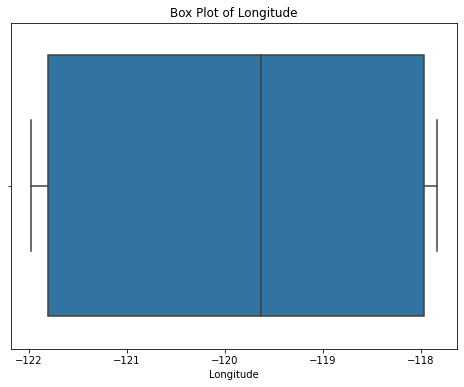

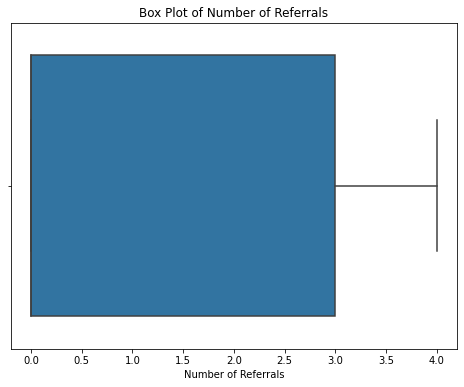

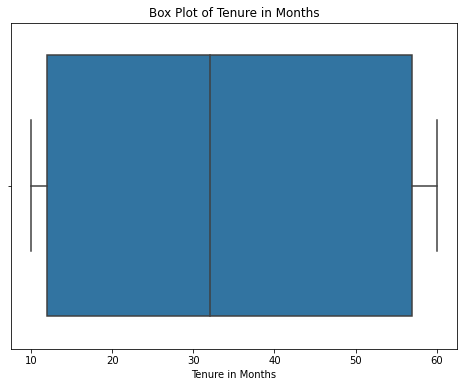

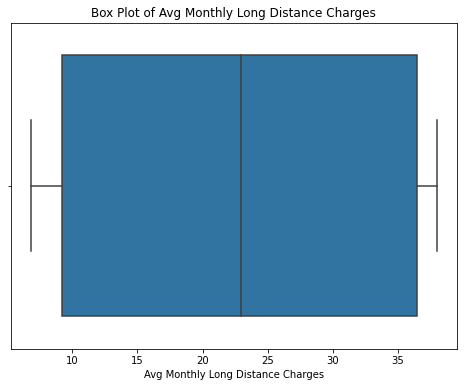

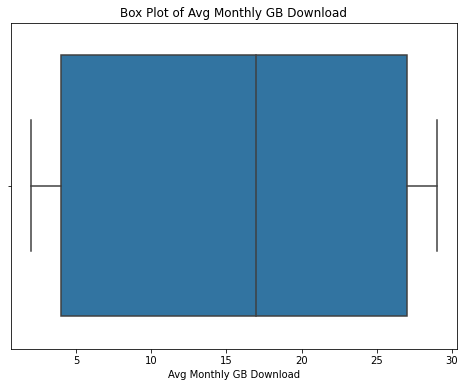

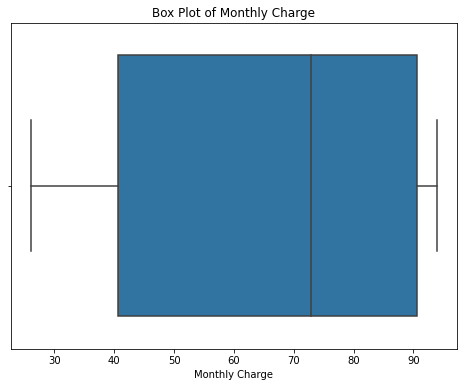

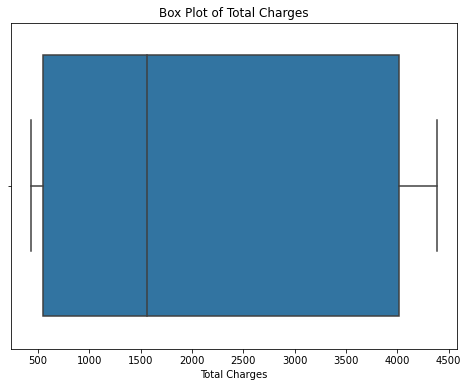

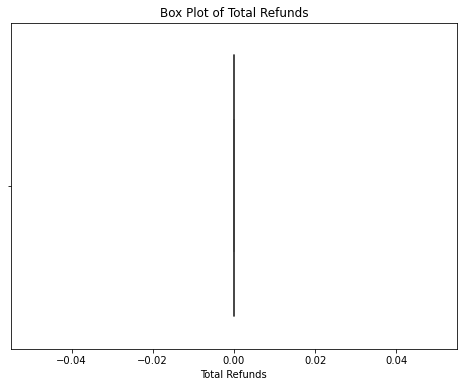

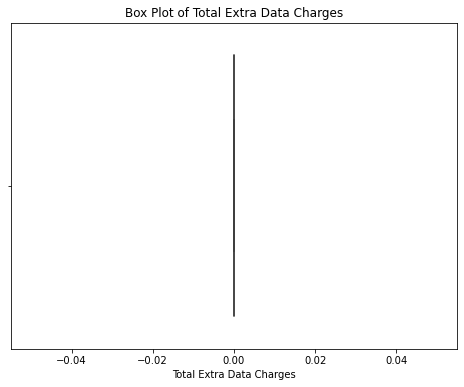

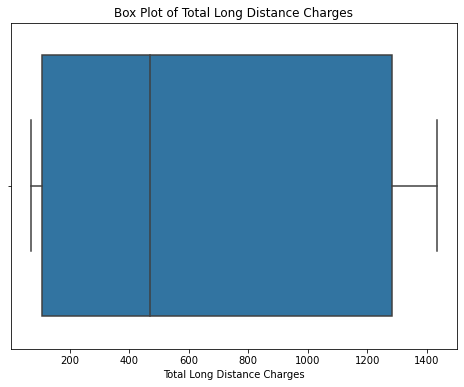

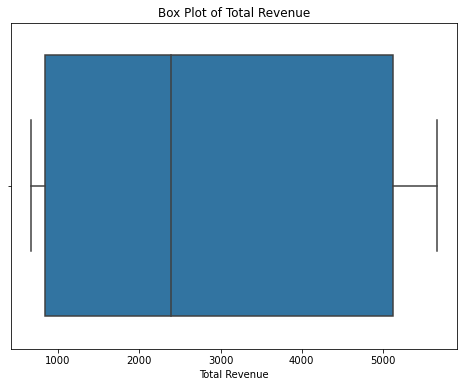

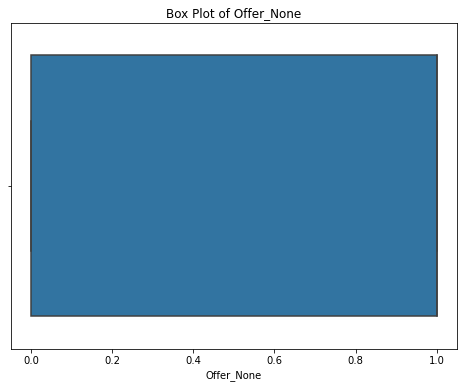

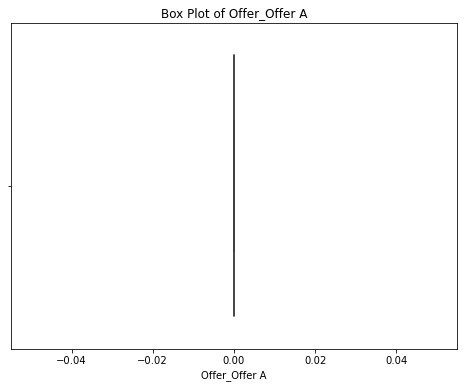

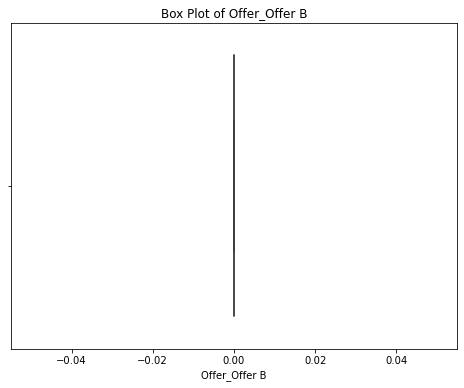

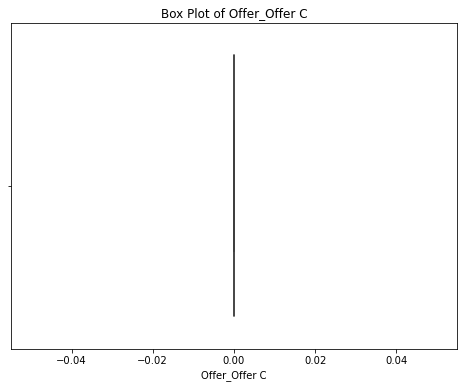

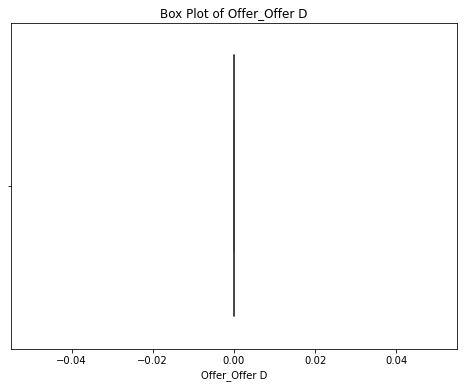

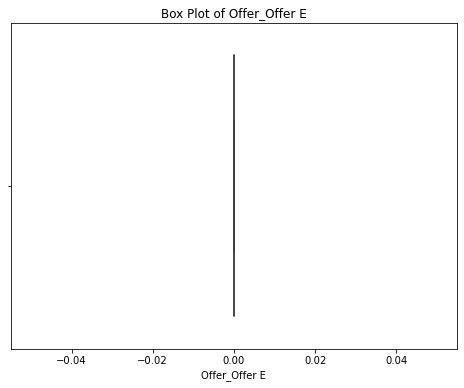

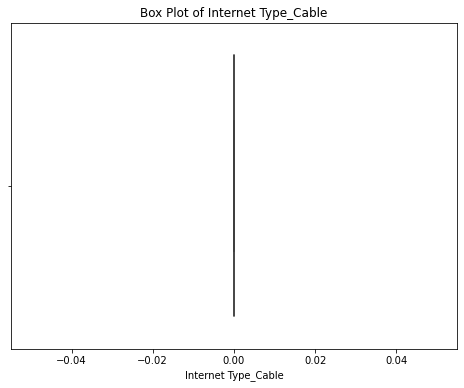

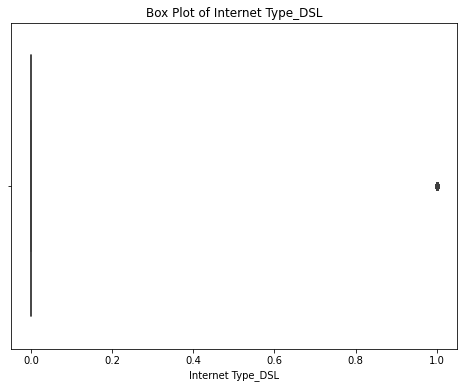

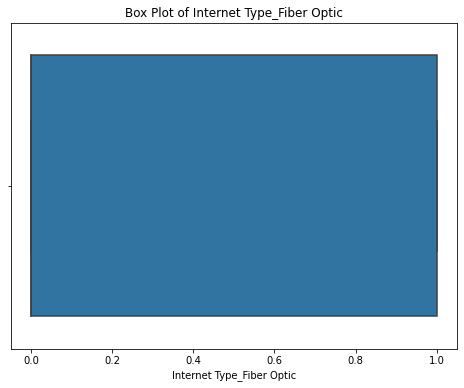

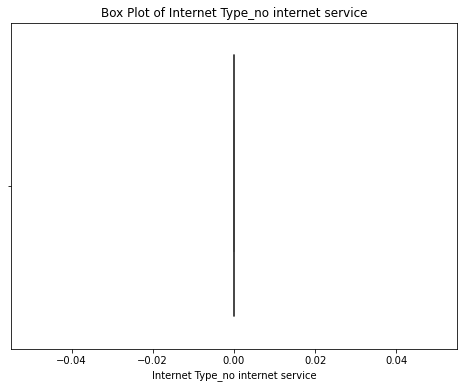

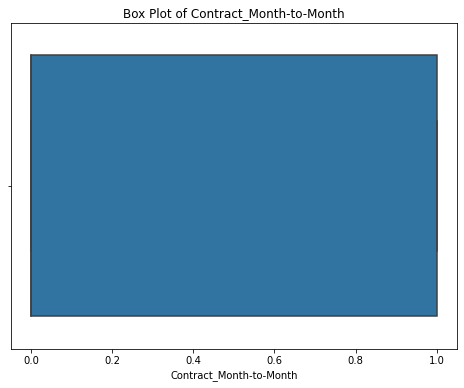

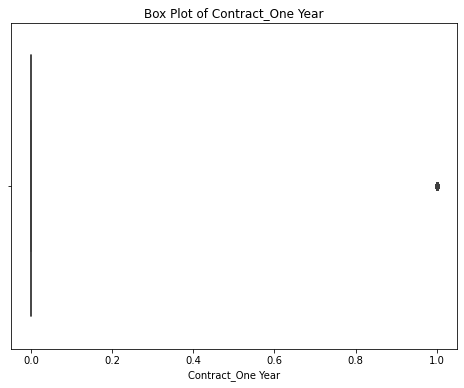

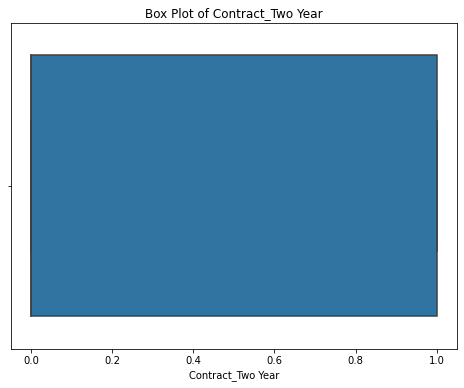

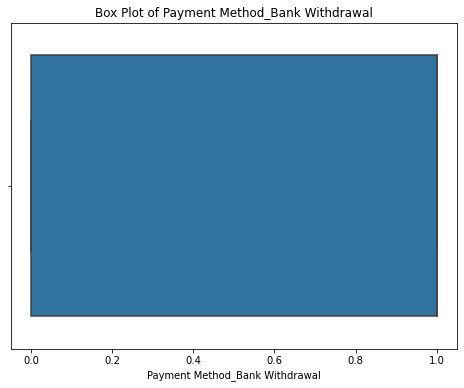

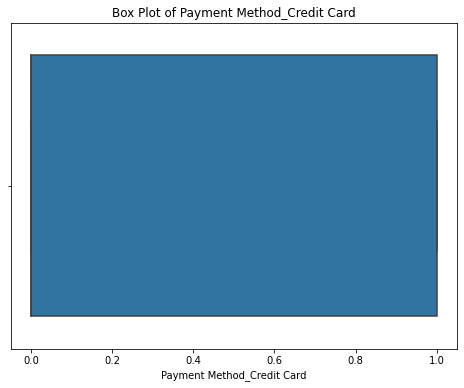

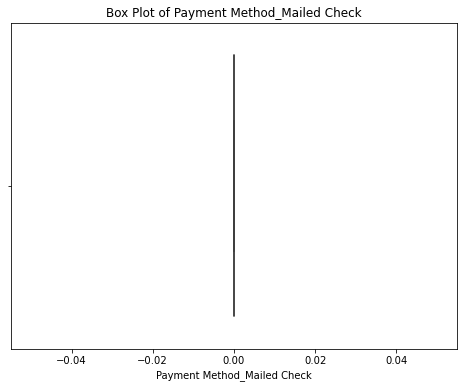

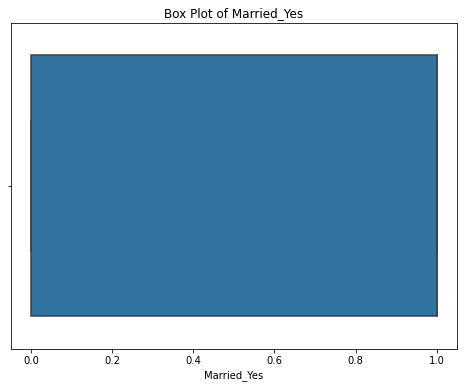

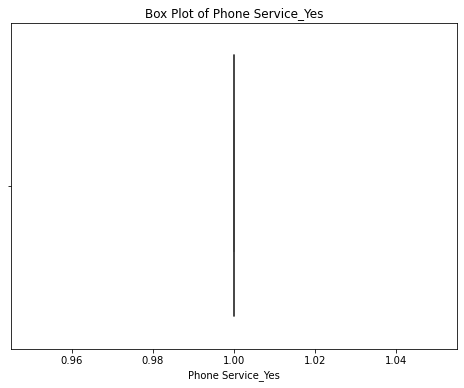

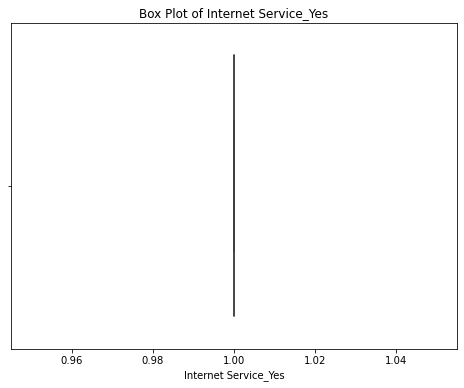

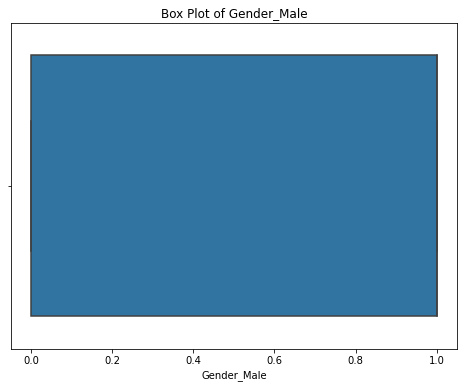

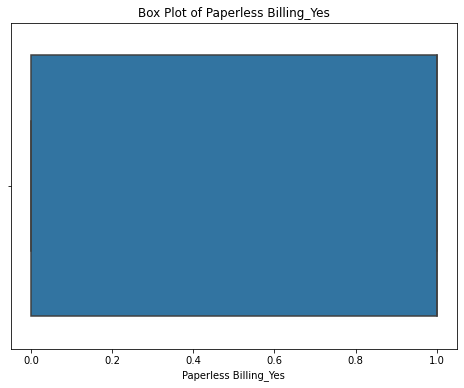

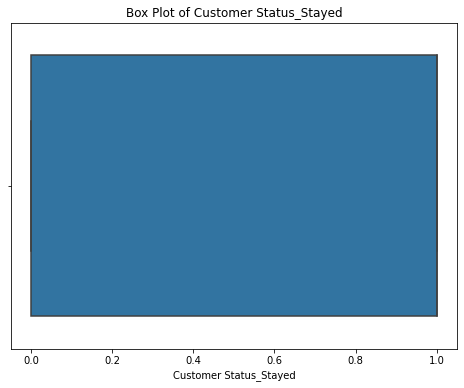

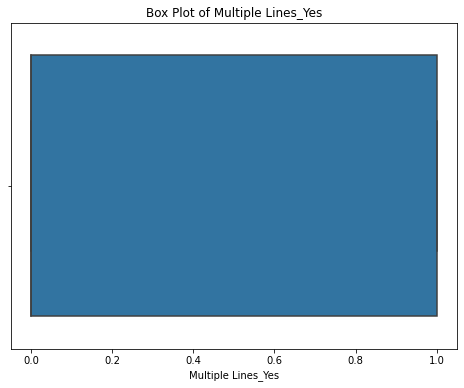

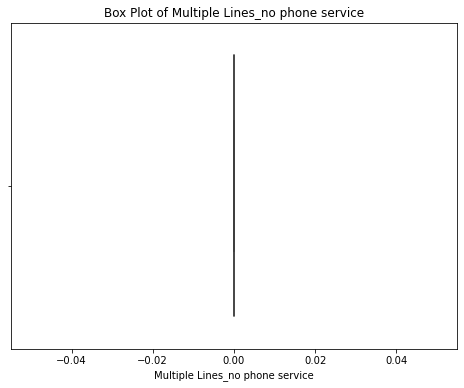

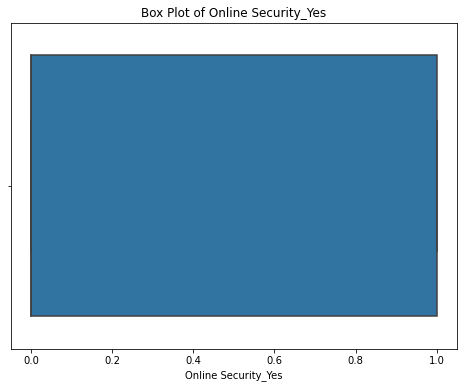

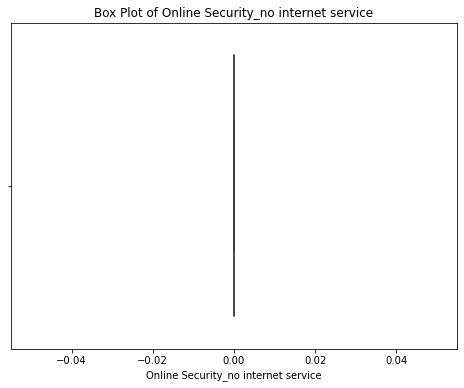

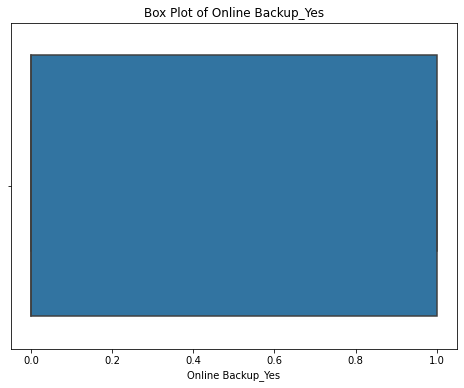

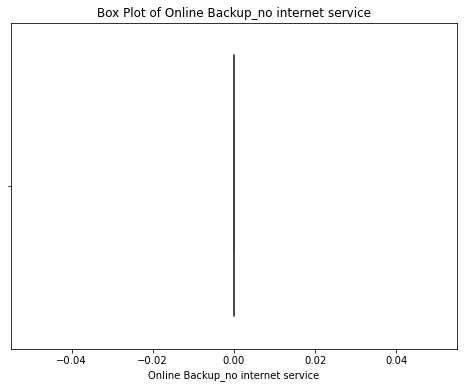

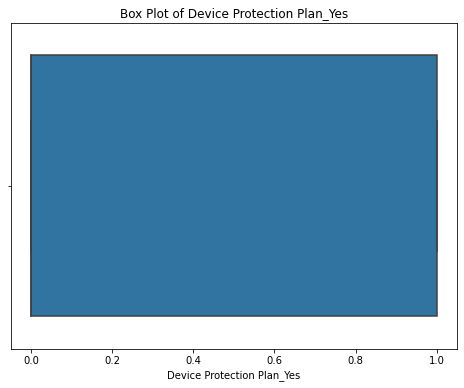

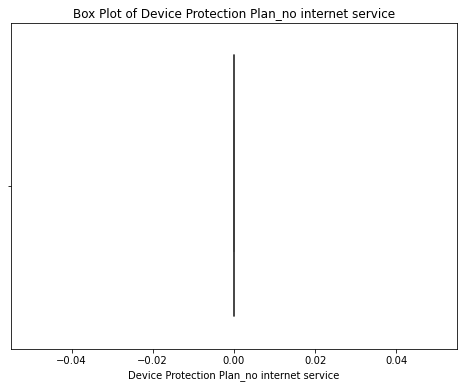

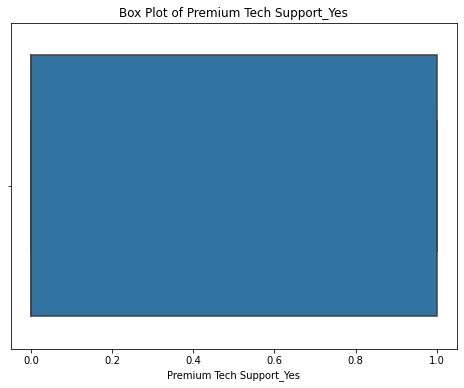

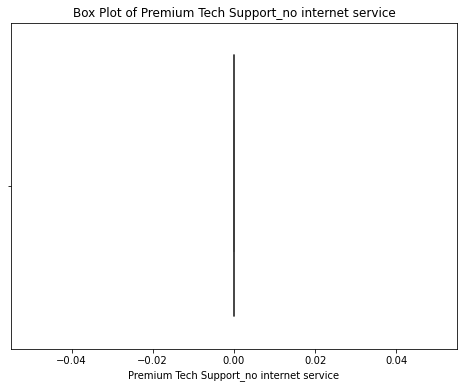

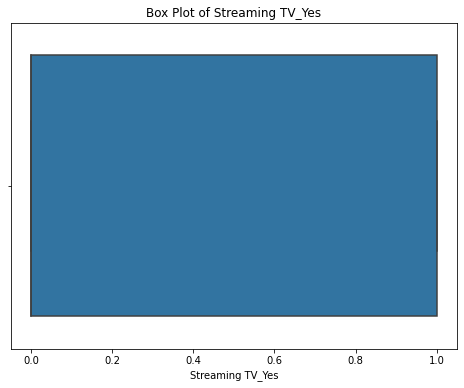

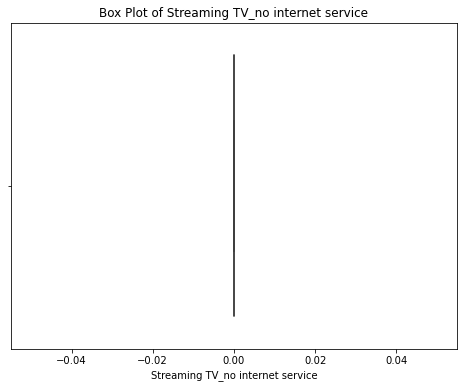

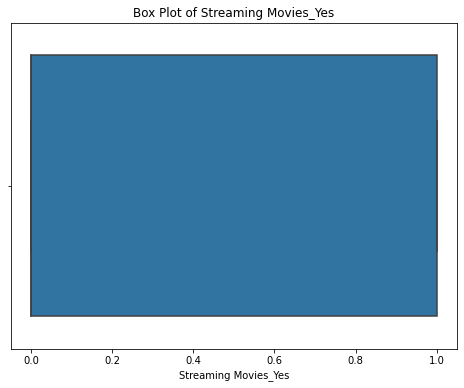

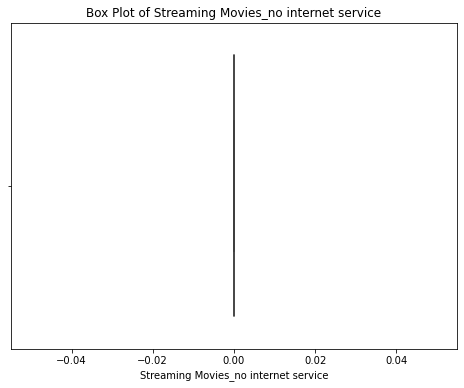

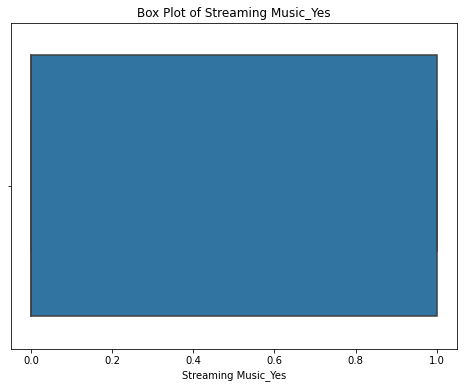

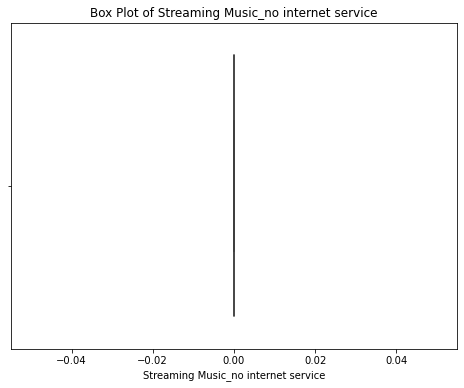

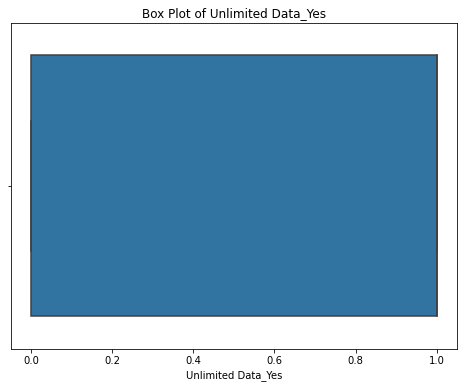

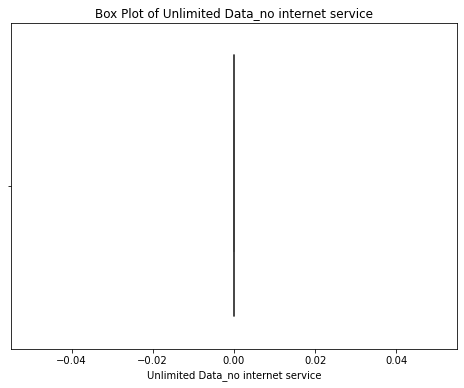

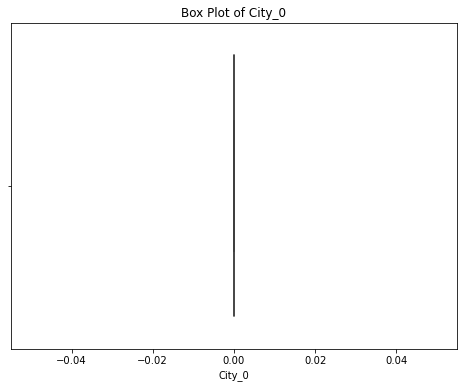

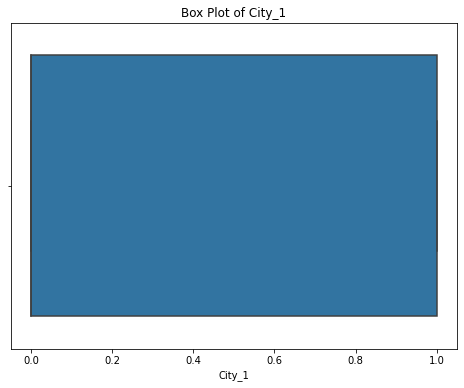

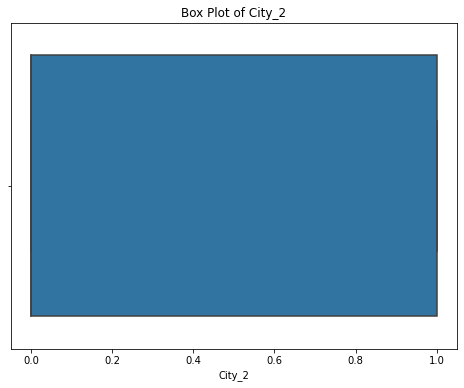

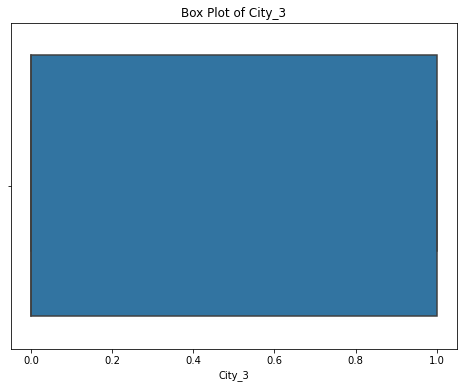

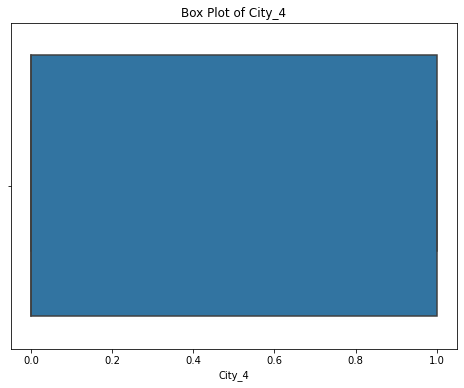

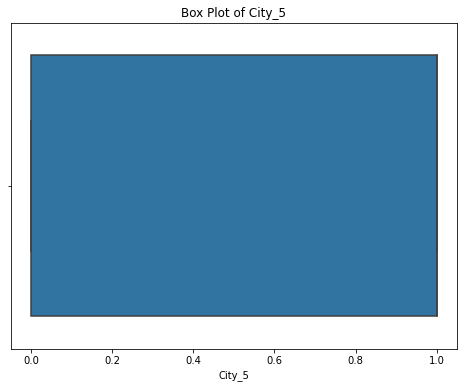

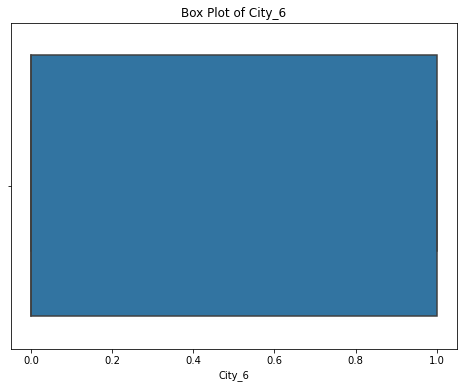

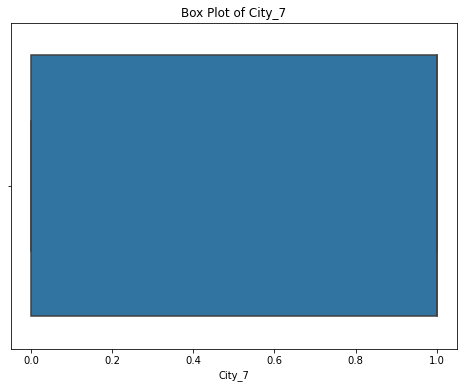

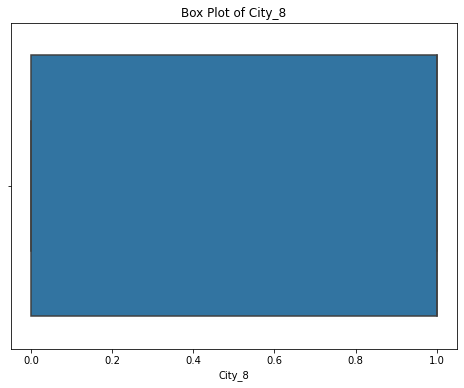

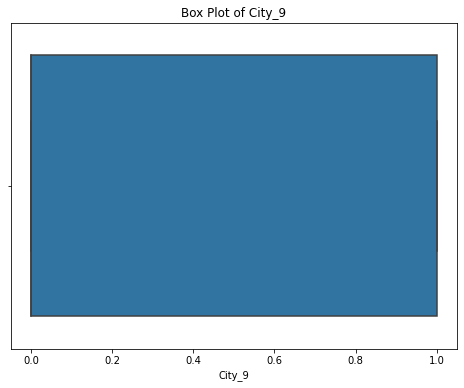

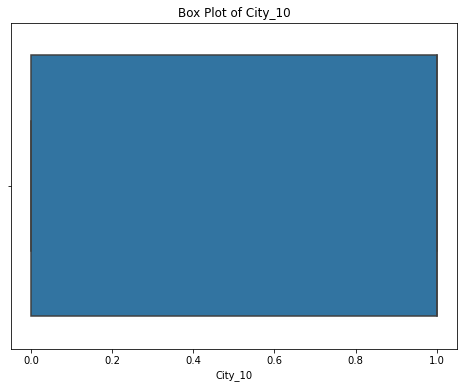

In [51]:
num_cols = df.select_dtypes(include=['int64', 'float64','int32']).columns
#Use box plots to identify outliers and understand the distribution. - Before Handling outliers
for col in num_cols:

    plt.figure(figsize=(8, 6))

    sns.boxplot(x=df[col])

    plt.title(f'Box Plot of {col}')

    plt.show()

In [52]:
#Normalize MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [53]:
df

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,...,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10
0,0.21875,0.0,0.366954,0.205501,0.719195,0.50,0.00,1.000000,0.518519,0.582737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.62500,0.0,0.195115,0.000000,0.979188,0.00,0.00,0.861248,1.000000,0.705115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.00000,0.0,0.748563,0.909274,0.000000,0.25,0.06,0.673996,0.074074,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.00000,0.0,0.305172,0.073037,0.699672,0.75,0.00,0.017492,0.333333,0.852557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.00000,1.0,0.976149,0.813658,0.484023,0.00,0.00,0.319086,1.000000,0.638766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0.18750,0.0,0.022989,0.000000,1.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7038,0.00000,0.0,0.000000,0.000000,1.000000,0.00,0.06,1.000000,1.000000,0.428660,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
7039,0.31250,0.0,0.982471,0.847552,0.246963,0.25,0.24,0.300778,0.555556,0.870251,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7041,0.00000,0.0,0.036494,0.000000,1.000000,1.00,1.00,0.000000,1.000000,0.615912,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
#Split the data into features(X) and labels(y)

X = df.drop(['Customer Status_Stayed'], axis=1)
y = df[['Customer Status_Stayed']]
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

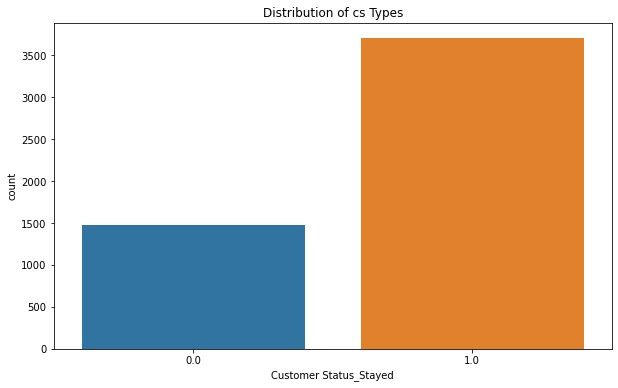

In [55]:
# Bar chart for precipitation type
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer Status_Stayed', data=y_train)
plt.title('Distribution of cs Types')
plt.show()

In [56]:
pip install --upgrade scikit-learn imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Data Splitting


In [61]:
# Apply SMOTE for oversampling the minority classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Count the resampled classes to verify the balance

resampled_df = pd.DataFrame(y_resampled, columns=['Customer Status_Stayed'])
class_count s_resampled = resampled_df['Customer Status_Stayed'].value_counts()
print("Resampled Class Counts:")
print(class_counts_resampled)

Resampled Class Counts:
1.0    3704
0.0    3704
Name: Customer Status_Stayed, dtype: int64


In [62]:
resampled_df

,Customer Status_Stayed
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
7403,0.0
7404,0.0
7405,0.0
7406,0.0


### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Train a logistic regression model on the resampled data
model2 = LogisticRegression(random_state=42)
model2.fit(X_resampled, y_resampled)
 
# Make predictions on the original test set
pred2 = model2.predict(X_test)


# Print accuracy

accuracy = accuracy_score(y_test, pred2)

print(f"Accuracy: {accuracy:.4f}")
 
# Print the classification report for the resampled model
print("Classification Report after SMOTE:")
print(classification_report(y_test, pred2))

C:\Users\Chamodhi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8216
Classification Report after SMOTE:
              precision    recall  f1-score   support

         0.0       0.63      0.87      0.73       363
         1.0       0.94      0.80      0.87       932

    accuracy                           0.82      1295
   macro avg       0.79      0.84      0.80      1295
weighted avg       0.85      0.82      0.83      1295



In [68]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### XG Booster

In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
 
# Assuming 'X_resampled', 'y_resampled', and 'X_test' are defined
 
# Encode the string labels into numerical labels
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)
 
# Train an XGBoost model on the resampled data
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_resampled, y_resampled_encoded)
 
# Make predictions on the original test set
pred_xgb = model_xgb.predict(X_test)
 
# Print accuracy
accuracy_xgb = accuracy_score(y_test_encoded, pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
 
# Print the classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test_encoded, pred_xgb))

C:\Users\Chamodhi\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chamodhi\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


XGBoost Accuracy: 0.8587

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       363
           1       0.90      0.90      0.90       932

    accuracy                           0.86      1295
   macro avg       0.83      0.82      0.82      1295
weighted avg       0.86      0.86      0.86      1295



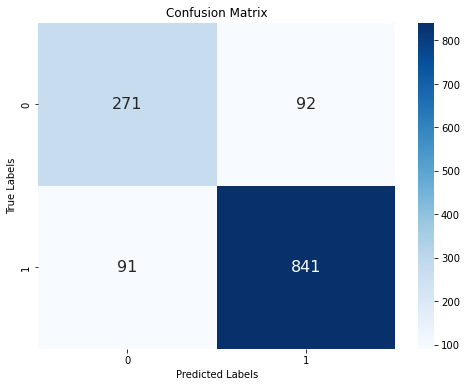

In [75]:
# pip install seaborn matplotlib
 
from sklearn.metrics import confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt
 
# Assuming 'y_test_encoded' and 'pred_xgb' are defined
 
# Compute the confusion matrix

cm = confusion_matrix(y_test_encoded, pred_xgb)
 
# Plot the confusion matrix using Seaborn heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()


### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score
 
# Assuming 'X_resampled', 'y_resampled', and 'X_test' are defined
 
# Train a Decision Tree model on the resampled data

model1 = DecisionTreeClassifier(random_state=42)

model1.fit(X_resampled, y_resampled)
 
# Make predictions on the original test set

pred1 = model1.predict(X_test)
 
# Print accuracy

accuracy = accuracy_score(y_test, pred1)

print(f"Accuracy: {accuracy:.4f}")
 
# Print the classification report

print("\nClassification Report:")

print(classification_report(y_test, pred1))
 

Accuracy: 0.7869

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.67      0.64       363
         1.0       0.87      0.83      0.85       932

    accuracy                           0.79      1295
   macro avg       0.74      0.75      0.74      1295
weighted avg       0.79      0.79      0.79      1295



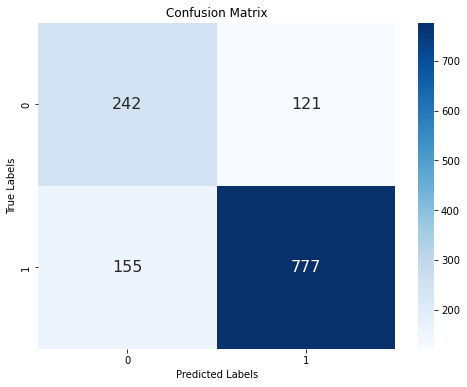

In [71]:
# pip install seaborn matplotlib
 
from sklearn.metrics import confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt
 
# Assuming 'y_test_encoded' and 'pred_xgb' are defined
 
# Compute the confusion matrix

cm = confusion_matrix(y_test, pred1)
 
# Plot the confusion matrix using Seaborn heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

### Random Forest

In [73]:
# Initializing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=50)

# Training the model
model2.fit(X_resampled,y_resampled)
pred3 = model2.predict(X_test)

accuracy = accuracy_score(y_test,pred3)
print(f"Accuracy: {accuracy:.4f}")
 
# Displaying classification report
print("Classification Report:")
print(classification_report(y_test, pred3))

C:\Users\Chamodhi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8463
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       363
         1.0       0.91      0.88      0.89       932

    accuracy                           0.85      1295
   macro avg       0.81      0.82      0.81      1295
weighted avg       0.85      0.85      0.85      1295



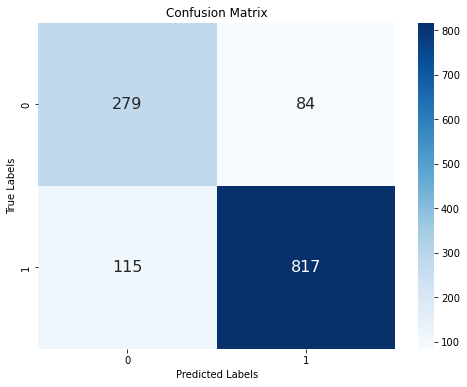

In [74]:
# pip install seaborn matplotlib
 
from sklearn.metrics import confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt
 
# Assuming 'y_test_encoded' and 'pred_xgb' are defined
 
# Compute the confusion matrix

cm = confusion_matrix(y_test, pred3)
 
# Plot the confusion matrix using Seaborn heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()


In [77]:
from sklearn.svm import SVC

# Initializing the Support Vector Classifier
svm_classifier = SVC(kernel='linear')  # 'linear' kernel for linear classification
 
# Training the model
svm_classifier.fit(X_resampled,y_resampled)
 
# Predicting on the test set
pred4 = svm_classifier.predict(X_test)
 
# Evaluating the model
accuracy = accuracy_score(y_test, pred4)
print(f"Accuracy: {accuracy}")
 
# Displaying classification report
print("Classification Report:")
print(classification_report(y_test, pred4))

C:\Users\Chamodhi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.806949806949807
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.87      0.72       363
         1.0       0.94      0.78      0.85       932

    accuracy                           0.81      1295
   macro avg       0.77      0.82      0.78      1295
weighted avg       0.85      0.81      0.82      1295



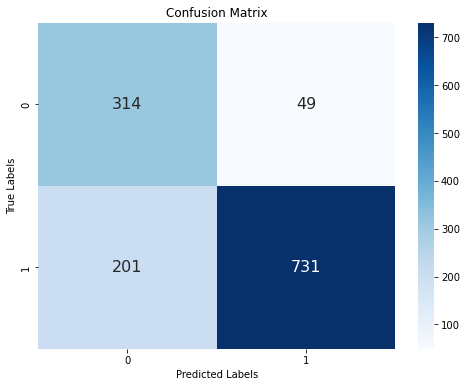

In [78]:
# pip install seaborn matplotlib
 
from sklearn.metrics import confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt
 
# Assuming 'y_test_encoded' and 'pred_xgb' are defined
 
# Compute the confusion matrix

cm = confusion_matrix(y_test, pred4)
 
# Plot the confusion matrix using Seaborn heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

In [80]:
from sklearn.naive_bayes import GaussianNB
# Instantiate the Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_resampled,y_resampled)

# Make predictions on the test data
y_pred7 = gnb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred7)
print("Accuracy:", accuracy)

Accuracy: 0.8108108108108109


C:\Users\Chamodhi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


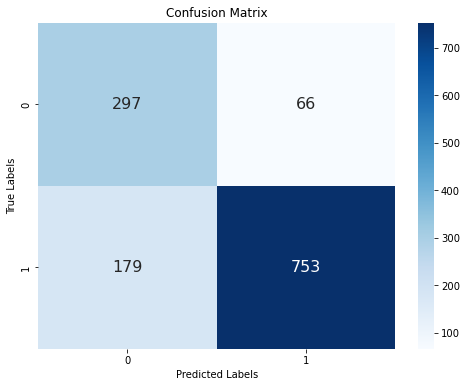

In [82]:
# pip install seaborn matplotlib
 
from sklearn.metrics import confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt
 
# Assuming 'y_test_encoded' and 'pred_xgb' are defined
 
# Compute the confusion matrix

cm = confusion_matrix(y_test, y_pred7)
 
# Plot the confusion matrix using Seaborn heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()